# Problem Definition



***Project Summary***

Introduction
Sleeping is a common activity for all the mammals. But there are huge discrepancies in the
characteristics of their sleep. For example, some mammals sleep 10% of their day, others
sleep 80% of their day. Many questions can be asked:
- Does a large mammal have a better sleep than a small mammal?
- Do predators have a better sleep than preys?
- Who has the longer dreams?
- All these questions can be answered with the dataset presented in this project.
- The dataset - Sleep_merged.tsv
- The dataset provides sleep attributes for 87 mammals. It provides general attributes of the species:
  * Species name of the species
  * Order lower taxonomic rank
  * Genus higher taxonomic rank
  * Vore Is it carnivore, omnivore, or herbivore?
  - Conservation the conservation status of the mammal in the International Union for
  - Conservation of Nature categories
  - Biological attributes of the species:
  - BodyWt body weight (kg)
  - BrainWt brain weight (g)
  - LifeSpan maximum life span (years)
  - Gestation gestation time (days)


***Ecological attributes of the species:***

  -Predation predation index (1-5) 1 = minimum (least likely to be preyed upon); 5 = maximum
  (most likely to be preyed upon)
  - Exposure sleep exposure index (1-5) 1 = least exposed (e.g. animal sleeps in a well-protected
  den); 5 = most exposed
  - Danger overall danger index (1-5) (based on the above two indices and other information)
  1 = least danger (from other animals); 5 = most danger (from other animals)


***Sleep attributes of the species:***

  - TotalSleep total sleep, sum of slow wave and paradoxical sleep (hrs/day)
  - Awake amount of time spent awake (hrs/day, Awake=24-TotalSleep)
  - NonDreaming slow wave ("nondreaming") sleep (hrs/day)
  - Dreaming paradoxical ("dreaming") sleep (hrs/day) detected by phase of REM (Rapid Eye
  Movement)

# Data Ingestion

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import kruskal
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

In [9]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DSTI/Project_ML/dataset.csv')

In [10]:
df_original = pd.read_csv('/content/drive/MyDrive/DSTI/Project_ML/dataset.csv')

In [11]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species       87 non-null     object 
 1   Genus         87 non-null     object 
 2   Order         87 non-null     object 
 3   Vore          87 non-null     object 
 4   Conservation  58 non-null     object 
 5   BodyWt        87 non-null     float64
 6   BrainWt       87 non-null     float64
 7   TotalSleep    87 non-null     float64
 8   Awake         87 non-null     float64
 9   NonDreaming   47 non-null     float64
 10  Dreaming      63 non-null     float64
 11  LifeSpan      54 non-null     float64
 12  Gestation     54 non-null     float64
 13  Predation     58 non-null     float64
 14  Exposure      58 non-null     float64
 15  Danger        58 non-null     float64
dtypes: float64(11), object(5)
memory usage: 11.0+ KB


# Data Processing

In [12]:
df.dtypes

Species          object
Genus            object
Order            object
Vore             object
Conservation     object
BodyWt          float64
BrainWt         float64
TotalSleep      float64
Awake           float64
NonDreaming     float64
Dreaming        float64
LifeSpan        float64
Gestation       float64
Predation       float64
Exposure        float64
Danger          float64
dtype: object

In [13]:
print(df_original.isna().sum())

Species          0
Genus            0
Order            0
Vore             0
Conservation    29
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        24
LifeSpan        33
Gestation       33
Predation       29
Exposure        29
Danger          29
dtype: int64


In [14]:
df_original.loc[df_original["Gestation"].isna()]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
1,Pilot whale,Globicephalus,Cetacea,carni,cd,800.000,0.00,2.7,21.35,NaN,0.1,NaN,NaN,NaN,NaN,NaN
4,Dog,Canis,Carnivora,carni,domesticated,14.000,70.00,10.1,13.90,NaN,2.9,NaN,NaN,NaN,NaN,NaN
15,Tiger,Panthera,Carnivora,carni,en,162.564,0.00,15.8,8.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Giant armadillo,Priodontes,Cingulata,insecti,en,60.000,81.00,18.1,5.90,12.0,6.1,7.0,NaN,1.0,1.0,1.0
17,Cheetah,Acinonyx,Carnivora,carni,lc,50.000,0.00,12.1,11.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,Greater short-tailed shrew,Blarina,Soricomorpha,omni,lc,0.019,0.29,14.9,9.10,NaN,2.3,NaN,NaN,NaN,NaN,NaN
24,Star-nosed mole,Condylura,Soricomorpha,omni,lc,0.060,1.00,10.3,13.70,8.1,2.2,3.5,NaN,3.0,1.0,2.0
33,Gray hyrax,Heterohyrax,Hyracoidea,herbi,lc,2.625,12.27,6.3,17.70,NaN,0.6,NaN,NaN,NaN,NaN,NaN
34,Thick-tailed opposum,Lutreolina,Didelphimorphia,carni,lc,0.370,0.00,19.4,4.60,NaN,6.6,NaN,NaN,NaN,NaN,NaN
35,Mongolian gerbil,Meriones,Rodentia,herbi,lc,0.053,0.00,14.2,9.80,NaN,1.9,NaN,NaN,NaN,NaN,NaN


In [15]:
df_original.loc[df_original["TotalSleep"].isna()]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger


In [16]:
df_original.describe()

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,54.000000,54.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,18.757011,144.696322,1.496214,1.575005,1.426989
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,6.125000,36.750000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,28.000000,195.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


In [78]:
df_spec = pd.read_excel('/content/drive/MyDrive/DSTI/Project_ML/1_Density per Spices.xls')
df_spec.head()

,Class,Order,Family,Genus,Species,Subspecies,Longitude,Latitude,Locality,Country,...,Season/Month,Habitat,Sampling_Area,Sampling_Area_unit,Density,Density_unit,Sampling_Method,Method_info,Notes,Ref_N
0,Amphibia,Anura,Brachycephalidae,Brachycephalus,didactylus,NaN,-44.200000,-23.183,Vila Dois Rios (Ilha Grande),Brazil,...,January – May,Atlantic rainforest,0.0064,ha,52.0,ind/ha,Incomplete_counts,24 plots 8x8m,NaN,1
1,Amphibia,Anura,Brachycephalidae,Brachycephalus,didactylus,NaN,-44.200000,-23.183,Vila Dois Rios (Ilha Grande),Brazil,...,January – May,Atlantic rainforest,0.0002,ha,1778.0,ind/ha,Incomplete_counts,90 plots 2x1m and litter removal method,NaN,1
2,Amphibia,Anura,Brachycephalidae,Brachycephalus,didactylus,NaN,-42.583000,-22.417,Fazenda Santa Bárbara in the Parque Estadual d...,Brazil,...,Late October - Early November,Atlantic rainforest,0.0025,ha,400.0,ind/ha,Incomplete_counts,25 plots 5x5m,NaN,2
3,Amphibia,Anura,Brachycephalidae,Brachycephalus,hermogenesi,NaN,-48.266667,-25.150,Reserva Particular do Patrimônio Natural Salto...,Brazil,...,Summer,Rainforest,0.2560,ha,16.0,ind/ha,Incomplete_counts,Counts in plots,NaN,3
4,Amphibia,Anura,Brachycephalidae,Brachycephalus,hermogenesi,NaN,-48.266667,-25.150,Reserva Particular do Patrimônio Natural Salto...,Brazil,...,Autumn,Rainforest,0.2560,ha,16.0,ind/ha,Incomplete_counts,Counts in plots,NaN,3


In [79]:
df_spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18246 entries, 0 to 18245
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class               18246 non-null  object 
 1   Order               18246 non-null  object 
 2   Family              18246 non-null  object 
 3   Genus               18246 non-null  object 
 4   Species             18246 non-null  object 
 5   Subspecies          827 non-null    object 
 6   Longitude           18245 non-null  float64
 7   Latitude            18245 non-null  float64
 8   Locality            15092 non-null  object 
 9   Country             18246 non-null  object 
 10  Year                17129 non-null  object 
 11  Season/Month        9911 non-null   object 
 12  Habitat             8856 non-null   object 
 13  Sampling_Area       11085 non-null  float64
 14  Sampling_Area_unit  11085 non-null  object 
 15  Density             18246 non-null  float64
 16  Dens

In [80]:
print(df_spec.isna().sum())

Class                     0
Order                     0
Family                    0
Genus                     0
Species                   0
Subspecies            17419
Longitude                 1
Latitude                  1
Locality               3154
Country                   0
Year                   1117
Season/Month           8335
Habitat                9390
Sampling_Area          7161
Sampling_Area_unit     7161
Density                   0
Density_unit              0
Sampling_Method        2792
Method_info            8627
Notes                 14726
Ref_N                     0
dtype: int64


In [81]:
df_spec.loc[df_spec["Genus"] == "Giraffa"]
#Order is different from the original doc so it can't be use ass key to join or I need to change all specific value ex(Cetartiodactyla =! Artiodactyla / Species_original =! species_spec (nom latin))

,Class,Order,Family,Genus,Species,Subspecies,Longitude,Latitude,Locality,Country,...,Season/Month,Habitat,Sampling_Area,Sampling_Area_unit,Density,Density_unit,Sampling_Method,Method_info,Notes,Ref_N
13532,Mammalia,Cetartiodactyla,Giraffidae,Giraffa,camelopardalis,NaN,29.366000,-21.066600,NaN,Zimbabwe,...,NaN,NaN,125.0,km2,0.650,ind/km2,Incomplete_counts,NaN,NaN,429
13533,Mammalia,Cetartiodactyla,Giraffidae,Giraffa,camelopardalis,NaN,26.562997,-19.076243,NaN,Zimbabwe,...,NaN,NaN,NaN,NaN,1.100,ind/km2,Incomplete_counts,NaN,NaN,429
13534,Mammalia,Cetartiodactyla,Giraffidae,Giraffa,camelopardalis,NaN,36.102144,-4.145353,NaN,Tanzania,...,NaN,NaN,100.0,km2,1.130,ind/km2,Incomplete_counts,NaN,NaN,429
13535,Mammalia,Cetartiodactyla,Giraffidae,Giraffa,camelopardalis,NaN,36.858844,-1.373375,NaN,Kenya,...,NaN,NaN,122.0,km2,0.720,ind/km2,Incomplete_counts,NaN,NaN,429
13536,Mammalia,Cetartiodactyla,Giraffidae,Giraffa,camelopardalis,NaN,31.500000,-24.900000,NaN,South Africa,...,NaN,NaN,550.0,km2,0.990,ind/km2,Incomplete_counts,NaN,NaN,429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13604,Mammalia,Cetartiodactyla,Giraffidae,Giraffa,camelopardalis,tippelskirchi,36.100000,-4.700000,Matete,Tanzania,...,September,Savanna,NaN,NaN,3.066,ind/km2,Incomplete_counts,Transect counts,NaN,384
13605,Mammalia,Cetartiodactyla,Giraffidae,Giraffa,camelopardalis,tippelskirchi,36.100000,-4.140000,Tarangire,Tanzania,...,October,Savanna,NaN,NaN,0.367,ind/km2,Census,Aerial survey,NaN,384
13606,Mammalia,Cetartiodactyla,Giraffidae,Giraffa,camelopardalis,tippelskirchi,36.100000,-4.140000,Tarangire,Tanzania,...,September,Savanna,NaN,NaN,1.000,ind/km2,Incomplete_counts,Transect counts,NaN,384
13607,Mammalia,Cetartiodactyla,Giraffidae,Giraffa,camelopardalis,tippelskirchi,36.100000,-4.140000,Tarangire,Tanzania,...,September,Savanna,NaN,NaN,1.004,ind/km2,Incomplete_counts,Transect counts,NaN,384


In [82]:
df_original.loc[(df_original["Genus"] == "Giraffa") & (df_original["Order"] == "Artiodactyla")]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,categorie_sleeper,categorie_dreamer
0,Giraffe,Giraffa,Artiodactyla,herbi,cd,899.995,680.0,1.9,22.1,NaN,0.3,28.0,400.0,5.0,5.0,5.0,Low sleeper,Low dreamer


In [83]:
df_mf = pd.read_csv('/content/drive/MyDrive/DSTI/Project_ML/2_Mammal_Functional Data.txt', sep='\t')
df_mf.head()

,MSW3_ID,Scientific,MSWFamilyLatin,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,...,ForStrat-Certainty,ForStrat-Comment,Activity-Nocturnal,Activity-Crepuscular,Activity-Diurnal,Activity-Source,Activity-Certainty,BodyMass-Value,BodyMass-Source,BodyMass-SpecLevel
0,1.0,Tachyglossus aculeatus,Tachyglossidae,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,A,NaN,1.0,1.0,0.0,Ref_1,ABC,3025.00,Ref_117,1.0
1,2.0,Zaglossus attenboroughi,Tachyglossidae,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,A,NaN,1.0,0.0,0.0,Ref_1,ABC,8532.39,"Ref_2, Ref_3",0.0
2,3.0,Zaglossus bartoni,Tachyglossidae,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,A,NaN,1.0,0.0,0.0,Ref_1,ABC,7180.00,Ref_131,1.0
3,4.0,Zaglossus bruijni,Tachyglossidae,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,A,NaN,1.0,0.0,0.0,Ref_1,ABC,10139.50,Ref_117,1.0
4,5.0,Ornithorhynchus anatinus,Ornithorhynchidae,80.0,0.0,0.0,20.0,0.0,0.0,0.0,...,A,NaN,1.0,1.0,1.0,Ref_1,ABC,1484.25,Ref_117,1.0


In [84]:
df_mf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSW3_ID               5400 non-null   float64
 1   Scientific            5400 non-null   object 
 2   MSWFamilyLatin        5400 non-null   object 
 3   Diet-Inv              5400 non-null   float64
 4   Diet-Vend             5400 non-null   float64
 5   Diet-Vect             5400 non-null   float64
 6   Diet-Vfish            5400 non-null   float64
 7   Diet-Vunk             5400 non-null   float64
 8   Diet-Scav             5400 non-null   float64
 9   Diet-Fruit            5400 non-null   float64
 10  Diet-Nect             5400 non-null   float64
 11  Diet-Seed             5400 non-null   float64
 12  Diet-PlantO           5400 non-null   float64
 13  Diet-Source           5400 non-null   object 
 14  Diet-Certainty        5400 non-null   object 
 15  ForStrat-Value       

In [85]:
print(df_mf.isna().sum())

MSW3_ID                    3
Scientific                 3
MSWFamilyLatin             3
Diet-Inv                   3
Diet-Vend                  3
Diet-Vect                  3
Diet-Vfish                 3
Diet-Vunk                  3
Diet-Scav                  3
Diet-Fruit                 3
Diet-Nect                  3
Diet-Seed                  3
Diet-PlantO                3
Diet-Source                3
Diet-Certainty             3
ForStrat-Value             3
ForStrat-Certainty         3
ForStrat-Comment        5203
Activity-Nocturnal         3
Activity-Crepuscular       3
Activity-Diurnal           3
Activity-Source            3
Activity-Certainty         3
BodyMass-Value             3
BodyMass-Source            3
BodyMass-SpecLevel         3
dtype: int64


In [86]:
df_mf.loc[df_mf["Scientific"] == "Artiodactyla"]

,MSW3_ID,Scientific,MSWFamilyLatin,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,...,ForStrat-Certainty,ForStrat-Comment,Activity-Nocturnal,Activity-Crepuscular,Activity-Diurnal,Activity-Source,Activity-Certainty,BodyMass-Value,BodyMass-Source,BodyMass-SpecLevel


In [87]:
df_mf.loc[df_mf["Scientific"] == "Cetacea"]

,MSW3_ID,Scientific,MSWFamilyLatin,Diet-Inv,Diet-Vend,Diet-Vect,Diet-Vfish,Diet-Vunk,Diet-Scav,Diet-Fruit,...,ForStrat-Certainty,ForStrat-Comment,Activity-Nocturnal,Activity-Crepuscular,Activity-Diurnal,Activity-Source,Activity-Certainty,BodyMass-Value,BodyMass-Source,BodyMass-SpecLevel


In [88]:
df_original.loc[df_original["Order"] == "Ornithorhynchidae"]
#Aucune correspondance, 1 seul clé possible sur correspondance nom latin)

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,categorie_sleeper,categorie_dreamer


In [89]:
df_ad = pd.read_csv('/content/drive/MyDrive/DSTI/Project_ML/3_Amniote_Database.csv')
df_ad.head()

,class,order,family,genus,species,subspecies,common_name,female_maturity_d,litter_or_clutch_size_n,litters_or_clutches_per_y,...,egg_length_mm,fledging_mass_g,adult_svl_cm,male_svl_cm,female_svl_cm,birth_or_hatching_svl_cm,female_svl_at_maturity_cm,female_body_mass_at_maturity_g,no_sex_svl_cm,no_sex_maturity_d
0,Aves,Accipitriformes,Accipitridae,Accipiter,albogularis,-999,Pied Goshawk,-999.000,-999.00,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0
1,Aves,Accipitriformes,Accipitridae,Accipiter,badius,-999,Shikra,363.468,3.25,1.0,...,-999.0,-999.0,30.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0
2,Aves,Accipitriformes,Accipitridae,Accipiter,bicolor,-999,Bicolored Hawk,-999.000,2.70,-999.0,...,-999.0,-999.0,39.5,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0
3,Aves,Accipitriformes,Accipitridae,Accipiter,brachyurus,-999,New Britain Sparrowhawk,-999.000,-999.00,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0
4,Aves,Accipitriformes,Accipitridae,Accipiter,brevipes,-999,Levant Sparrowhawk,363.468,4.00,1.0,...,-999.0,-999.0,33.5,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0


In [90]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21322 entries, 0 to 21321
Data columns (total 36 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   class                                  21322 non-null  object 
 1   order                                  21322 non-null  object 
 2   family                                 21322 non-null  object 
 3   genus                                  21322 non-null  object 
 4   species                                21322 non-null  object 
 5   subspecies                             21322 non-null  int64  
 6   common_name                            21322 non-null  object 
 7   female_maturity_d                      21322 non-null  float64
 8   litter_or_clutch_size_n                21322 non-null  float64
 9   litters_or_clutches_per_y              21322 non-null  float64
 10  adult_body_mass_g                      21322 non-null  float64
 11  ma

In [91]:
print(df_ad.isna().sum())

class                                    0
order                                    0
family                                   0
genus                                    0
species                                  0
subspecies                               0
common_name                              0
female_maturity_d                        0
litter_or_clutch_size_n                  0
litters_or_clutches_per_y                0
adult_body_mass_g                        0
maximum_longevity_y                      0
gestation_d                              0
weaning_d                                0
birth_or_hatching_weight_g               0
weaning_weight_g                         0
egg_mass_g                               0
incubation_d                             0
fledging_age_d                           0
longevity_y                              0
male_maturity_d                          0
inter_litter_or_interbirth_interval_y    0
female_body_mass_g                       0
male_body_m

In [92]:
df_ad.loc[(df_ad["genus"] == "Giraffa") & (df_ad["order"] == "Artiodactyla")]

,class,order,family,genus,species,subspecies,common_name,female_maturity_d,litter_or_clutch_size_n,litters_or_clutches_per_y,...,egg_length_mm,fledging_mass_g,adult_svl_cm,male_svl_cm,female_svl_cm,birth_or_hatching_svl_cm,female_svl_at_maturity_cm,female_body_mass_at_maturity_g,no_sex_svl_cm,no_sex_maturity_d
10043,Mammalia,Artiodactyla,Giraffidae,Giraffa,camelopardalis,-999,Giraffe,1380.26878,1.12,0.54,...,-999.0,-999.0,445.0515,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0


In [93]:
df_ad.loc[(df_ad["genus"] == "Gorilla") & (df_ad["order"] == "Primates")]

,class,order,family,genus,species,subspecies,common_name,female_maturity_d,litter_or_clutch_size_n,litters_or_clutches_per_y,...,egg_length_mm,fledging_mass_g,adult_svl_cm,male_svl_cm,female_svl_cm,birth_or_hatching_svl_cm,female_svl_at_maturity_cm,female_body_mass_at_maturity_g,no_sex_svl_cm,no_sex_maturity_d
12258,Mammalia,Primates,Hominidae,Gorilla,beringei,-999,Eastern Gorilla,3091.06,1.000,0.3,...,-999.0,-999.0,167.222,-999.0,-999.0,-999.0,-999.0,-999,-999.0,4383.0
12259,Mammalia,Primates,Hominidae,Gorilla,gorilla,-999,Western Gorilla,2829.00,1.005,0.3,...,-999.0,-999.0,167.222,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0


In [94]:
df_ad.loc[df_ad["species"].duplicated(keep=False)]

,class,order,family,genus,species,subspecies,common_name,female_maturity_d,litter_or_clutch_size_n,litters_or_clutches_per_y,...,egg_length_mm,fledging_mass_g,adult_svl_cm,male_svl_cm,female_svl_cm,birth_or_hatching_svl_cm,female_svl_at_maturity_cm,female_body_mass_at_maturity_g,no_sex_svl_cm,no_sex_maturity_d
0,Aves,Accipitriformes,Accipitridae,Accipiter,albogularis,-999,Pied Goshawk,-999.000,-999.00,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0
1,Aves,Accipitriformes,Accipitridae,Accipiter,badius,-999,Shikra,363.468,3.25,1.0,...,-999.0,-999.0,30.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0
2,Aves,Accipitriformes,Accipitridae,Accipiter,bicolor,-999,Bicolored Hawk,-999.000,2.70,-999.0,...,-999.0,-999.0,39.5,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0
3,Aves,Accipitriformes,Accipitridae,Accipiter,brachyurus,-999,New Britain Sparrowhawk,-999.000,-999.00,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0
4,Aves,Accipitriformes,Accipitridae,Accipiter,brevipes,-999,Levant Sparrowhawk,363.468,4.00,1.0,...,-999.0,-999.0,33.5,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21316,Reptilia,Testudines,Trionychidae,Nilssonia,gangetica,-999,Ganges Soft-shelled Turtle,-999.000,30.20,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0
21317,Reptilia,Testudines,Trionychidae,Nilssonia,nigricans,-999,"Black Soft-shelled Turtle, Bostami Turtle",-999.000,20.20,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0
21318,Reptilia,Testudines,Trionychidae,Palea,steindachneri,-999,Wattle-necked Soft-shelled Turtle,-999.000,15.50,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0
21319,Reptilia,Testudines,Trionychidae,Pelochelys,bibroni,-999,Asian or Bibron's Giant soft-shelled Turtle,-999.000,26.00,-999.0,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999,-999.0,-999.0


In [95]:
df_ad.rename(columns={"order":"Order" , "genus":"Genus"}, inplace=True)

df_test = pd.merge(df_original, df_ad, on=["Order","Genus"], how="left")
display(df_test)

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,...,egg_length_mm,fledging_mass_g,adult_svl_cm,male_svl_cm,female_svl_cm,birth_or_hatching_svl_cm,female_svl_at_maturity_cm,female_body_mass_at_maturity_g,no_sex_svl_cm,no_sex_maturity_d
0,Giraffe,Giraffa,Artiodactyla,herbi,cd,899.995,680.0,1.9,22.10,NaN,...,-999.0,-999.0,445.0515,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00
1,Pilot whale,Globicephalus,Cetacea,carni,cd,800.000,0.0,2.7,21.35,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gorilla,Gorilla,Primates,herbi,cr,207.000,406.0,12.0,12.00,NaN,...,-999.0,-999.0,167.2220,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,4383.00
3,Gorilla,Gorilla,Primates,herbi,cr,207.000,406.0,12.0,12.00,NaN,...,-999.0,-999.0,167.2220,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00
4,Cow,Bos,Artiodactyla,herbi,domesticated,600.000,423.0,4.0,20.00,3.2,...,-999.0,-999.0,300.0000,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.50,NaN,...,-999.0,-999.0,65.0800,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00
839,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.50,NaN,...,-999.0,-999.0,48.9315,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,365.25
840,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.50,NaN,...,-999.0,-999.0,51.4395,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00
841,Arctic fox,Vulpes,Carnivora,carni,NaN,3.380,44.5,12.5,11.50,NaN,...,-999.0,-999.0,63.0000,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00


In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 842
Data columns (total 52 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Species                                843 non-null    object 
 1   Genus                                  843 non-null    object 
 2   Order                                  843 non-null    object 
 3   Vore                                   843 non-null    object 
 4   Conservation                           438 non-null    object 
 5   BodyWt                                 843 non-null    float64
 6   BrainWt                                843 non-null    float64
 7   TotalSleep                             843 non-null    float64
 8   Awake                                  843 non-null    float64
 9   NonDreaming                            495 non-null    float64
 10  Dreaming                               602 non-null    float64
 11  LifeSp

In [97]:
print(df_test.isna().sum())

Species                                    0
Genus                                      0
Order                                      0
Vore                                       0
Conservation                             405
BodyWt                                     0
BrainWt                                    0
TotalSleep                                 0
Awake                                      0
NonDreaming                              348
Dreaming                                 241
LifeSpan                                 322
Gestation                                285
Predation                                266
Exposure                                 266
Danger                                   266
categorie_sleeper                          0
categorie_dreamer                          0
class                                      6
family                                     6
species                                    6
subspecies                                 6
common_nam

In [98]:
df_test.loc[df_test["Species"].duplicated(keep=False)]

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,...,egg_length_mm,fledging_mass_g,adult_svl_cm,male_svl_cm,female_svl_cm,birth_or_hatching_svl_cm,female_svl_at_maturity_cm,female_body_mass_at_maturity_g,no_sex_svl_cm,no_sex_maturity_d
2,Gorilla,Gorilla,Primates,herbi,cr,207.00,406.0,12.0,12.0,NaN,...,-999.0,-999.0,167.2220,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,4383.00
3,Gorilla,Gorilla,Primates,herbi,cr,207.00,406.0,12.0,12.0,NaN,...,-999.0,-999.0,167.2220,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00
4,Cow,Bos,Artiodactyla,herbi,domesticated,600.00,423.0,4.0,20.0,3.2,...,-999.0,-999.0,300.0000,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00
5,Cow,Bos,Artiodactyla,herbi,domesticated,600.00,423.0,4.0,20.0,3.2,...,-999.0,-999.0,325.0000,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00
6,Cow,Bos,Artiodactyla,herbi,domesticated,600.00,423.0,4.0,20.0,3.2,...,-999.0,-999.0,216.2500,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,Arctic fox,Vulpes,Carnivora,carni,NaN,3.38,44.5,12.5,11.5,NaN,...,-999.0,-999.0,65.0800,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00
839,Arctic fox,Vulpes,Carnivora,carni,NaN,3.38,44.5,12.5,11.5,NaN,...,-999.0,-999.0,48.9315,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,365.25
840,Arctic fox,Vulpes,Carnivora,carni,NaN,3.38,44.5,12.5,11.5,NaN,...,-999.0,-999.0,51.4395,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00
841,Arctic fox,Vulpes,Carnivora,carni,NaN,3.38,44.5,12.5,11.5,NaN,...,-999.0,-999.0,63.0000,-999.0,-999.0,-999.00,-999.0,-999.0,-999.0,-999.00


# Exploratory Data Analysis

Lucas work

In [19]:
# Data Cleaning
df_clean = df.dropna().drop_duplicates()
df_clean = df.dropna().drop_duplicates()
df_clean['Species'] = df_clean['Species'].astype('category')
df_clean['Order'] = df_clean['Order'].astype('category')
df_clean['Genus'] = df_clean['Genus'].astype('category')
df_clean['Vore'] = df_clean['Vore'].astype('category')
df_clean['Conservation'] = df_clean['Conservation'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 3 to 57
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Species       28 non-null     category
 1   Genus         28 non-null     category
 2   Order         28 non-null     category
 3   Vore          28 non-null     category
 4   Conservation  28 non-null     category
 5   BodyWt        28 non-null     float64 
 6   BrainWt       28 non-null     float64 
 7   TotalSleep    28 non-null     float64 
 8   Awake         28 non-null     float64 
 9   NonDreaming   28 non-null     float64 
 10  Dreaming      28 non-null     float64 
 11  LifeSpan      28 non-null     float64 
 12  Gestation     28 non-null     float64 
 13  Predation     28 non-null     float64 
 14  Exposure      28 non-null     float64 
 15  Danger        28 non-null     float64 
dtypes: category(5), float64(11)
memory usage: 6.3 KB


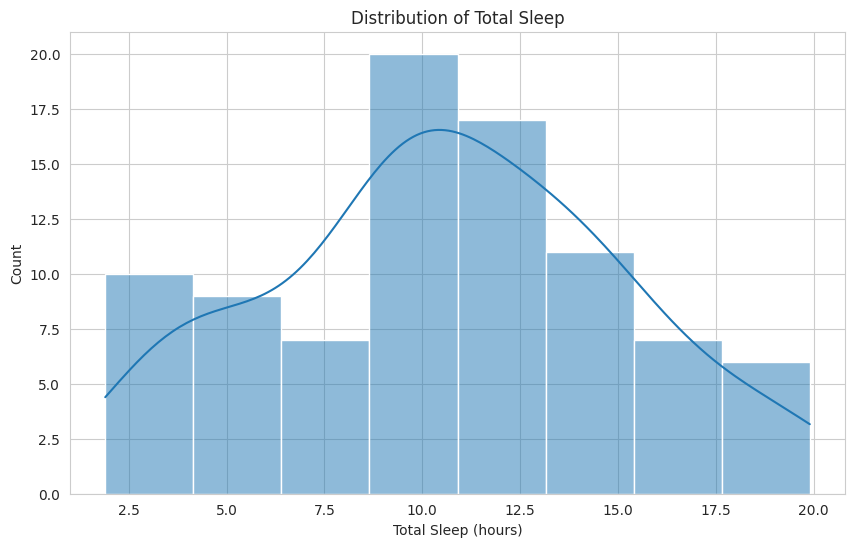

In [20]:
sns.set_style("whitegrid")

# Plot histogram of the 'TotalSleep' column with kernel density estimation (KDE)
plt.figure(figsize=(10, 6))
sns.histplot(df_original['TotalSleep'], kde=True)
plt.title('Distribution of Total Sleep')
plt.xlabel('Total Sleep (hours)')
plt.ylabel('Count')
plt.show()

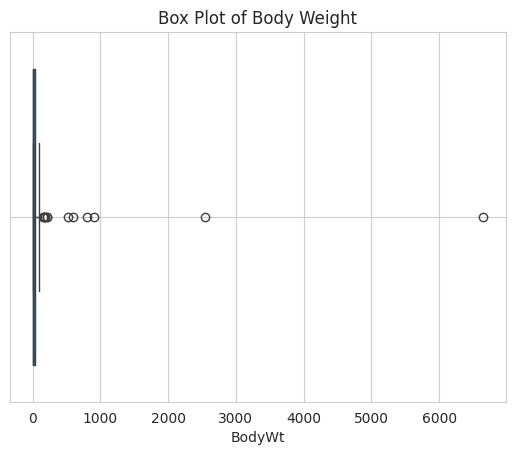

In [21]:
# Identifying outliers in Body Weight
sns.boxplot(x=df_original['BodyWt'])
plt.title('Box Plot of Body Weight')
plt.grid(True)
plt.show()

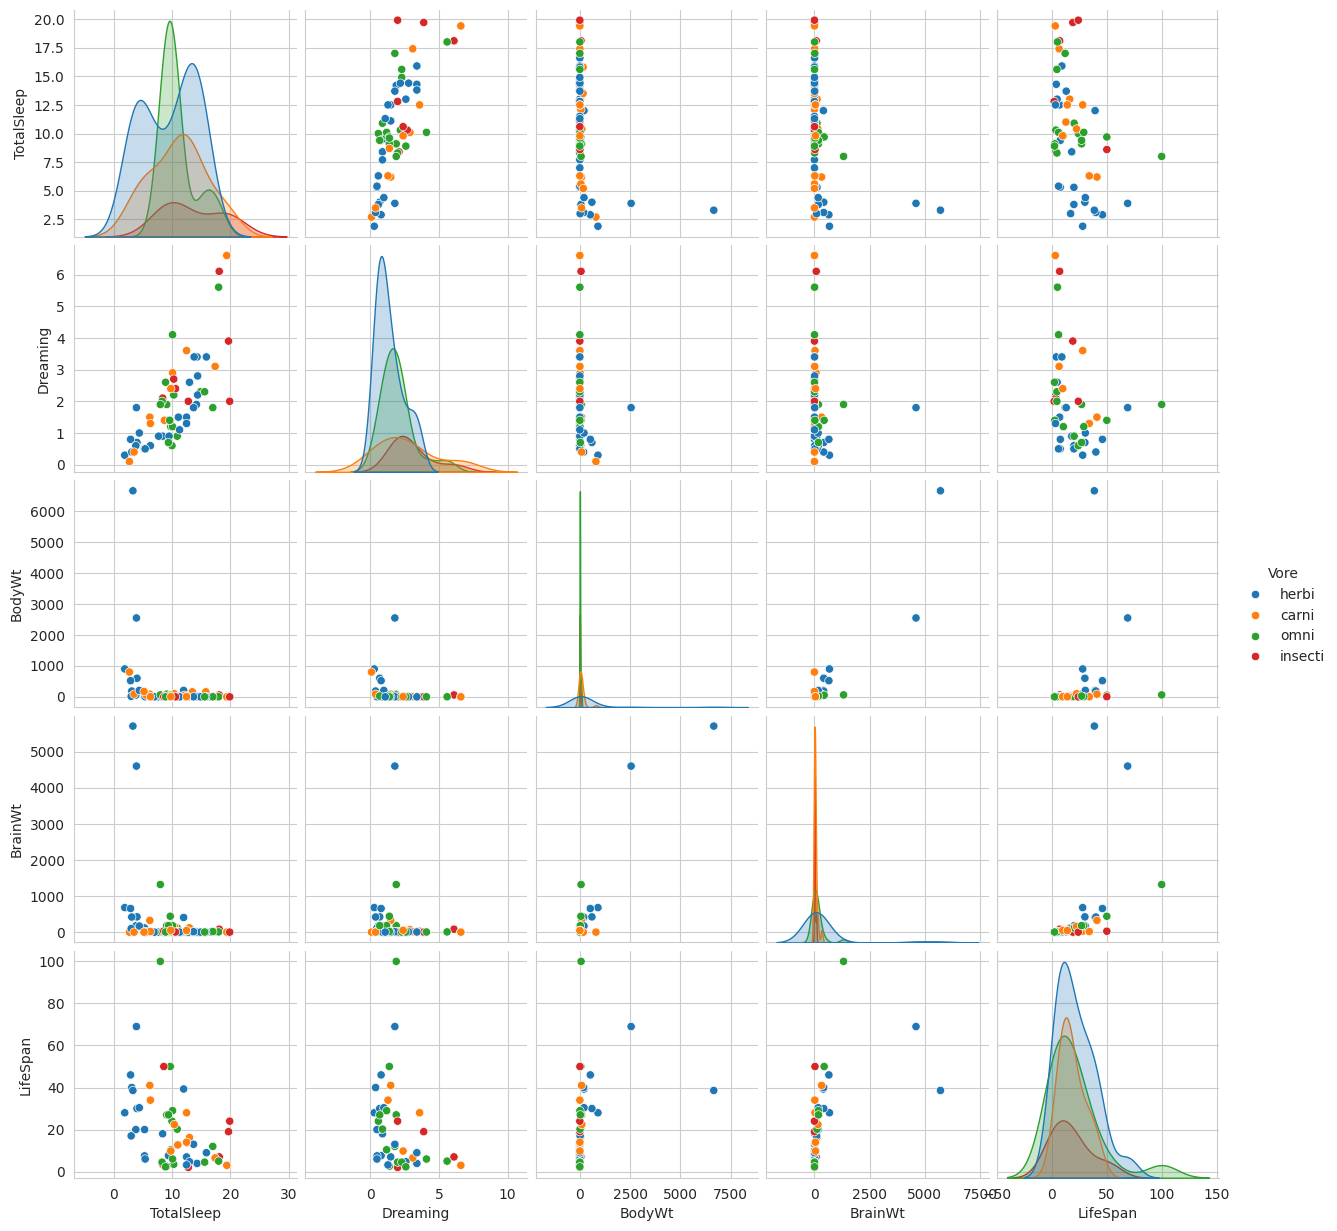

In [22]:
# Pair plot for a subset of variables with 'Vore' as hue
sns.pairplot(df_original[['TotalSleep', 'Dreaming', 'BodyWt', 'BrainWt', 'LifeSpan', 'Vore']], hue='Vore')
plt.show()

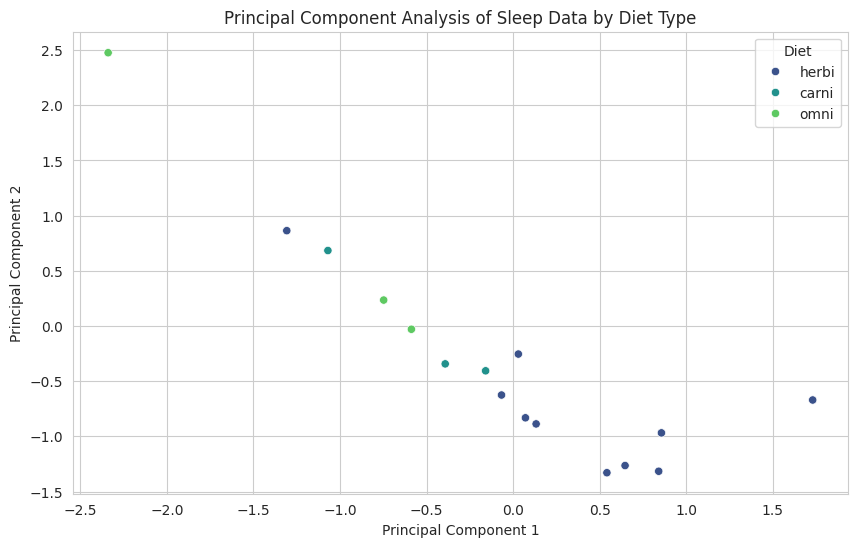

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming df_original is your original DataFrame containing sleep data
# df_original = ...

# Drop rows with missing values
df_cleaned = df_original.dropna()

# Select relevant columns
numerical_columns = ['BodyWt', 'BrainWt', 'TotalSleep', 'Dreaming']
sleep_data = df_cleaned[numerical_columns]

# Standardize the features
scaler = StandardScaler()
scaled_sleep_data = scaler.fit_transform(sleep_data)

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_sleep_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])

# Concatenate the PCA DataFrame with the diet type from the original DataFrame
pca_df['Vore'] = df_cleaned['Vore']

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Vore', data=pca_df, palette='viridis')
plt.title('Principal Component Analysis of Sleep Data by Diet Type')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diet')
plt.grid(True)
plt.show()


The scatter plot titled "PCA of Sleep Data by Diet Type" visualizes the results of a Principal Component Analysis (PCA) on sleep data categorized by diet type. The graph plots the first two principal components, which are linear combinations of the original variables that explain the maximum amount of variance in the data.

Overall, the PCA plot suggests that there may be some relationship between diet type and sleep characteristics, with the first principal component showing a clearer separation between herbivorous/insectivorous and carnivorous/omnivorous diets.

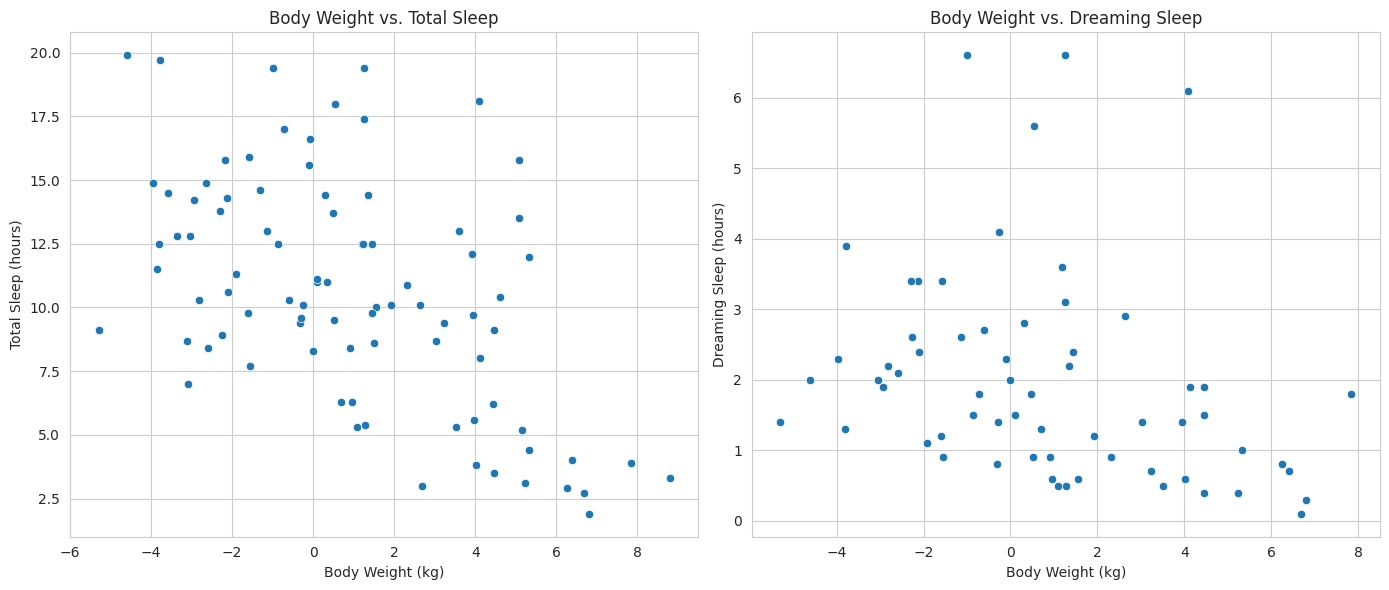

In [27]:
plt.figure(figsize=(14, 6))

# Subplot 1: Body Weight vs. Total Sleep
plt.subplot(1, 2, 1)
sns.scatterplot(x=np.log(df_original['BodyWt']), y='TotalSleep', data=df_original)
plt.xlabel('Body Weight (kg)')
plt.ylabel('Total Sleep (hours)')
plt.title('Body Weight vs. Total Sleep')

# Subplot 2: Body Weight vs. Dreaming Sleep
plt.subplot(1, 2, 2)
sns.scatterplot(x=np.log(df_original['BodyWt']), y='Dreaming', data=df_original)
plt.xlabel('Body Weight (kg)')
plt.ylabel('Dreaming Sleep (hours)')
plt.title('Body Weight vs. Dreaming Sleep')

plt.tight_layout()
plt.show()

**Body Weight vs. Total Sleep**

The left scatter plot shows a general trend where animals with lower body weights tend to sleep more total hours.
There is a wide spread of total sleep hours among animals with lower body weights, indicating high variability.
As body weight increases, the total sleep hours seem to decrease, although the data points are more scattered, suggesting a weaker relationship.


**Body Weight vs. Dreaming Sleep**

The right scatter plot illustrates the relationship between body weight and the amount of dreaming sleep (likely REM sleep).
Similar to total sleep, there is a trend where lighter animals experience more hours of dreaming sleep.
The spread of dreaming sleep hours is also wide among lighter animals, and it narrows as body weight increases.
The decrease in dreaming sleep hours with increased body weight is more pronounced and consistent than the decrease in total sleep hours.


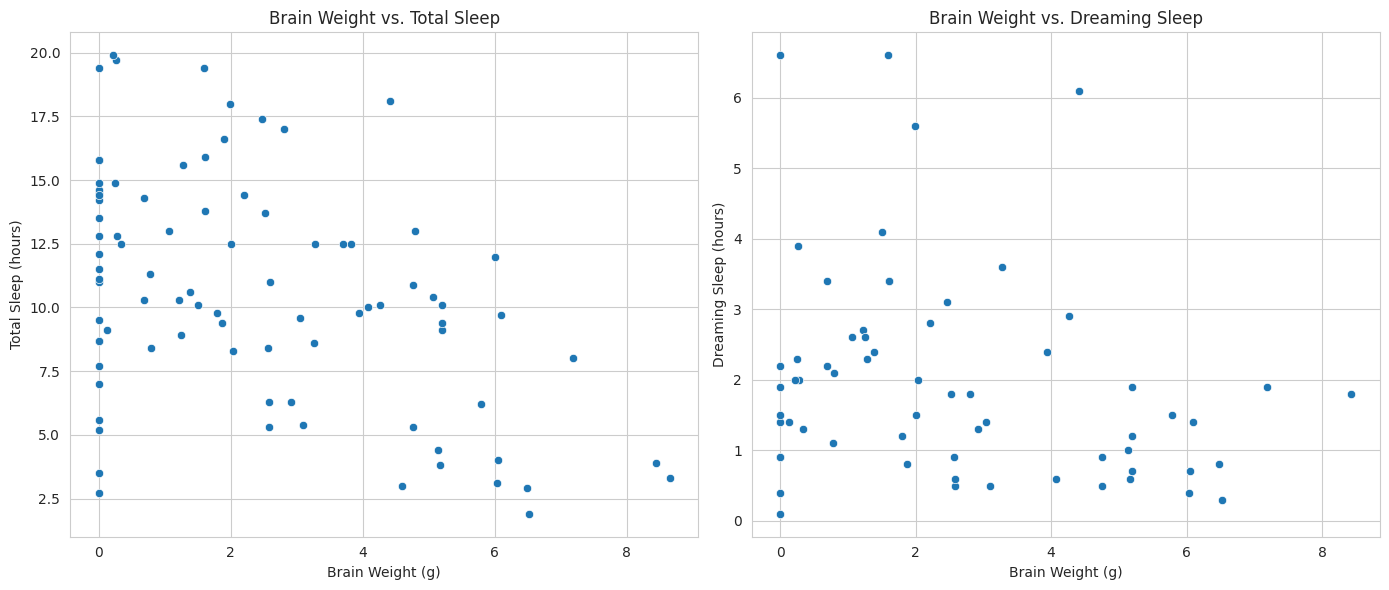

In [28]:
plt.figure(figsize=(14, 6))

# Subplot 1: Brain Weight vs. Total Sleep
plt.subplot(1, 2, 1)
sns.scatterplot(x=np.log1p(df_original['BrainWt']), y='TotalSleep', data=df_original)
plt.xlabel('Brain Weight (g)')
plt.ylabel('Total Sleep (hours)')
plt.title('Brain Weight vs. Total Sleep')

# Subplot 2: Brain Weight vs. Dreaming Sleep
plt.subplot(1, 2, 2)
sns.scatterplot(x=np.log1p(df_original['BrainWt']), y='Dreaming', data=df_original)
plt.xlabel('Brain Weight (g)')
plt.ylabel('Dreaming Sleep (hours)')
plt.title('Brain Weight vs. Dreaming Sleep')

plt.tight_layout()
plt.show()

**Brain Weight vs. Total Sleep**

There is a wide range of total sleep times across the spectrum of brain weights.
A cluster of data points suggests that animals with smaller brain weights tend to have a higher variability in total sleep time, with some sleeping for nearly 20 hours and others less than 5 hours.
There is no clear linear relationship between brain weight and total sleep time; the data does not indicate that animals with heavier brains necessarily sleep more or less overall.

**Brain Weight vs. Dreaming Sleep**

The range of dreaming sleep time is narrower than total sleep time, with most data points falling between 0 and 3 hours, regardless of brain weight.
There is a slight concentration of data points indicating that animals with smaller brain weights may experience more dreaming sleep, but this trend is not strong.
Similar to the total sleep time, there is no evident linear relationship between brain weight and dreaming sleep time.

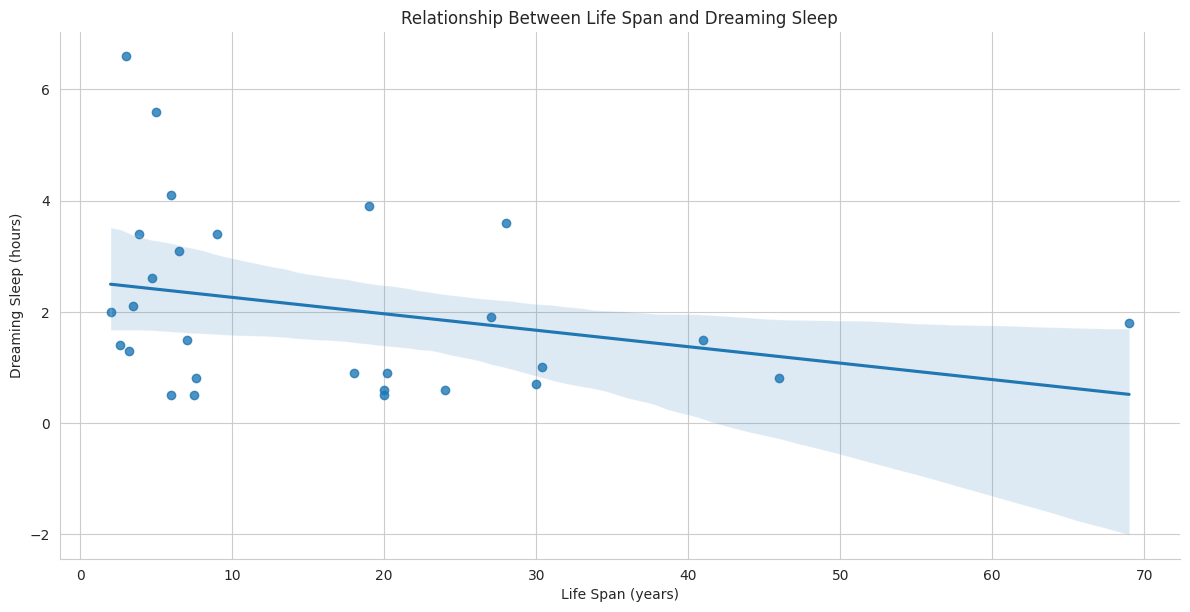

In [29]:
# Dreaming Sleep and Life Span Relationship
sns.lmplot(x='LifeSpan', y='Dreaming', data=df_clean, aspect=2, height=6)
plt.title('Relationship Between Life Span and Dreaming Sleep')
plt.xlabel('Life Span (years)')
plt.ylabel('Dreaming Sleep (hours)')
plt.show()

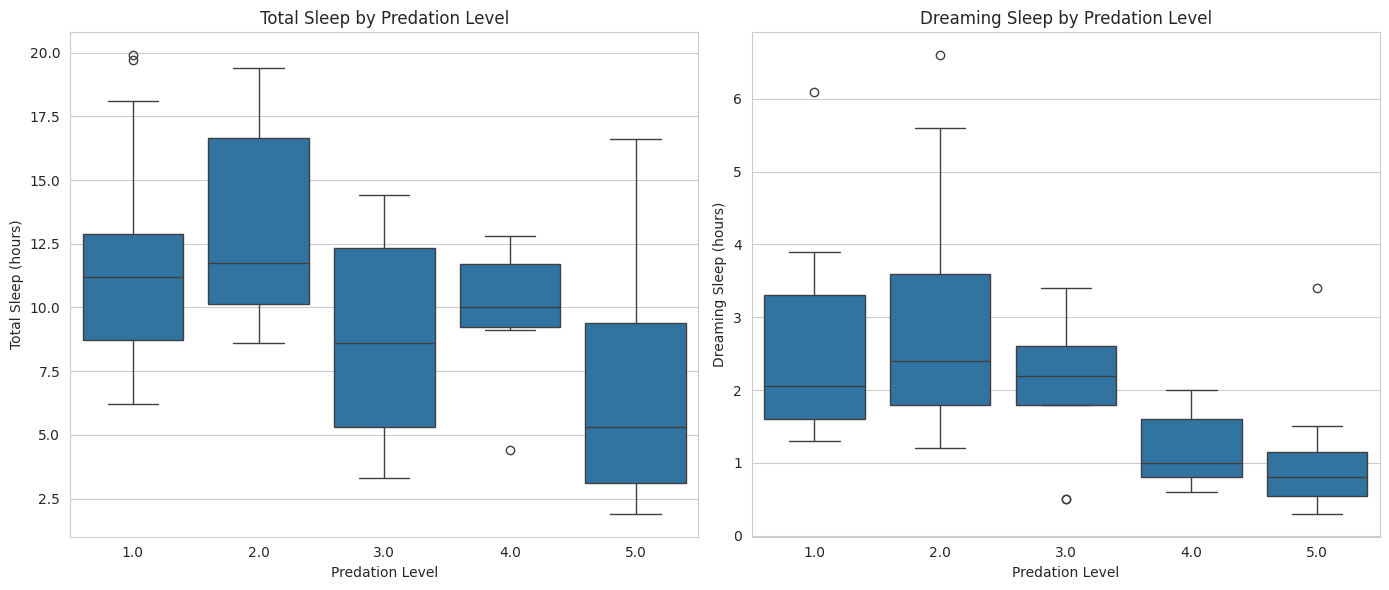

In [30]:
plt.figure(figsize=(14, 6))

# Subplot 1: Box plot of Total Sleep by Predation Level
plt.subplot(1, 2, 1)
sns.boxplot(x='Predation', y='TotalSleep', data=df_original)
plt.xlabel('Predation Level')
plt.ylabel('Total Sleep (hours)')
plt.title('Total Sleep by Predation Level')

# Subplot 2: Box plot of Dreaming Sleep by Predation Level
plt.subplot(1, 2, 2)
sns.boxplot(x='Predation', y='Dreaming', data=df_original)
plt.xlabel('Predation Level')
plt.ylabel('Dreaming Sleep (hours)')
plt.title('Dreaming Sleep by Predation Level')

plt.tight_layout()
plt.show()

**Total Sleep by Predation Level**:

Animals with a predation level of 1 have a wider range of total sleep hours, with a median around 13.5 hours. As the predation level increases, the median total sleep time tends to decrease, with animals at predation level 5 having the lowest median sleep time, just above 10 hours. The interquartile range (IQR) also decreases with higher predation levels, indicating less variability in sleep duration among animals that are higher on the predation scale. There are outliers present at predation levels 1 and 5, indicating that there are some animals that sleep significantly more or less than the typical range.

**Dreaming Sleep by Predation Level**:

The median dreaming sleep hours also decrease as the predation level increases. Animals at predation level 1 have the highest median dreaming sleep, around 3 hours, while those at level 5 have the lowest, around 1 hour. The IQR for dreaming sleep is generally smaller than for total sleep, suggesting that dreaming sleep duration is more consistent among animals within the same predation level. Outliers are present at predation levels 1, 2, and 4, indicating some animals experience significantly more dreaming sleep than their peers.

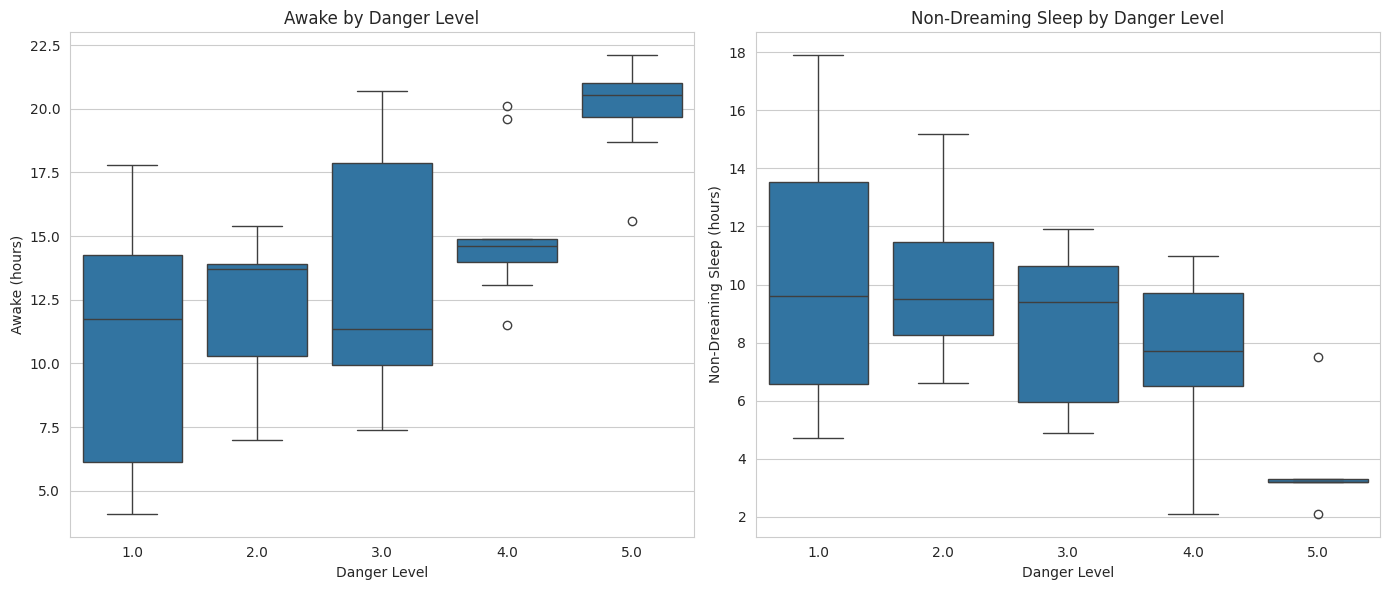

In [31]:
plt.figure(figsize=(14, 6))

# Subplot 1: Box plot of Awake vs. Danger Level
plt.subplot(1, 2, 1)
sns.boxplot(x='Danger', y='Awake', data=df_original)
plt.xlabel('Danger Level')
plt.ylabel('Awake (hours)')
plt.title('Awake by Danger Level')

# Subplot 2: Box plot of Non-Dreaming Sleep by Danger Level
plt.subplot(1, 2, 2)
sns.boxplot(x='Danger', y='NonDreaming', data=df_original)
plt.xlabel('Danger Level')
plt.ylabel('Non-Dreaming Sleep (hours)')
plt.title('Non-Dreaming Sleep by Danger Level')

plt.tight_layout()
plt.show()

**Awake by Danger Level:**

As the danger level increases from 1 to 5, there is a general trend of decreasing time spent awake. The median awake time is highest at the lowest danger level and decreases with each subsequent level. The interquartile range (IQR), which represents the middle 50% of the data, also decreases as the danger level increases, suggesting that the variability in awake time tends to be lower at higher danger levels. There are outliers at danger levels 3 and 4, indicating that there are some instances where individuals are awake for significantly longer than the typical range.

**Non-Dreaming Sleep by Danger Level:**

The time spent in non-dreaming sleep does not show a clear trend with respect to danger level. The median sleep time is highest at danger level 2, decreases at level 3, and then increases slightly at level 4. The IQR is relatively consistent across danger levels 1 through 3 but narrows at level 4. There is an outlier at danger level 5, where one instance shows significantly less non-dreaming sleep than the rest.

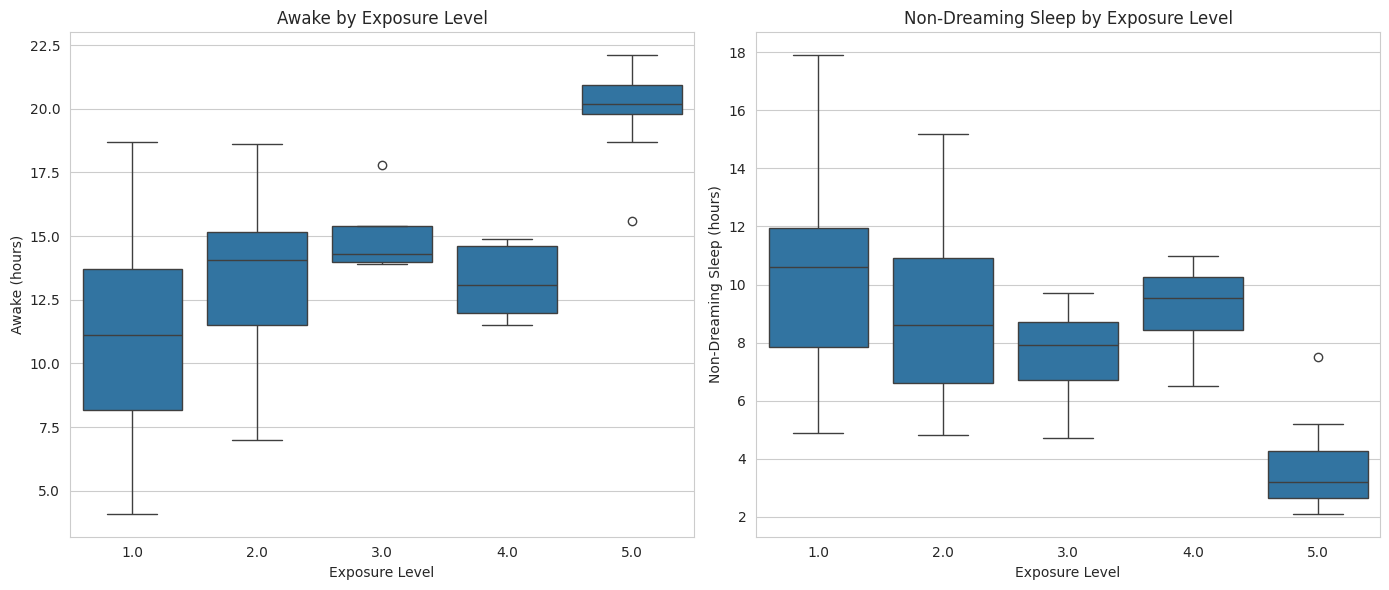

In [32]:
plt.figure(figsize=(14, 6))

# Subplot 1: Box plot of Awake vs. Exposure Level
plt.subplot(1, 2, 1)
sns.boxplot(x='Exposure', y='Awake', data=df_original)
plt.xlabel('Exposure Level')
plt.ylabel('Awake (hours)')
plt.title('Awake by Exposure Level')

# Subplot 2: Box plot of Non-Dreaming Sleep by Exposure Level
plt.subplot(1, 2, 2)
sns.boxplot(x='Exposure', y='NonDreaming', data=df_original)
plt.xlabel('Exposure Level')
plt.ylabel('Non-Dreaming Sleep (hours)')
plt.title('Non-Dreaming Sleep by Exposure Level')

plt.tight_layout()
plt.show()

**Awake by Exposure Level:**

As the exposure level increases from 1.0 to 5.0, there is a clear downward trend in the median hours spent awake. The median awake time is highest at the lowest exposure level (1.0) and decreases with each subsequent level. The interquartile range (IQR), which represents the middle 50% of the data, also decreases with higher exposure levels, indicating less variability in awake time at higher exposures. There are a few outliers at exposure levels 1.0 and 5.0, indicating some individuals with awake times that are unusually high compared to the rest of the data at those levels.

**Non-Dreaming Sleep by Exposure Level:**

The median hours of non-dreaming sleep also show a decreasing trend as exposure levels increase. The highest median sleep duration is at the lowest exposure level (1.0), and it decreases as the exposure level rises. The IQR for non-dreaming sleep is relatively consistent across exposure levels 1.0 to 3.0 but becomes narrower at levels 4.0 and 5.0. There is an outlier at exposure level 5.0, suggesting an individual with an unusually low amount of non-dreaming sleep.

**Garam's work everything below**

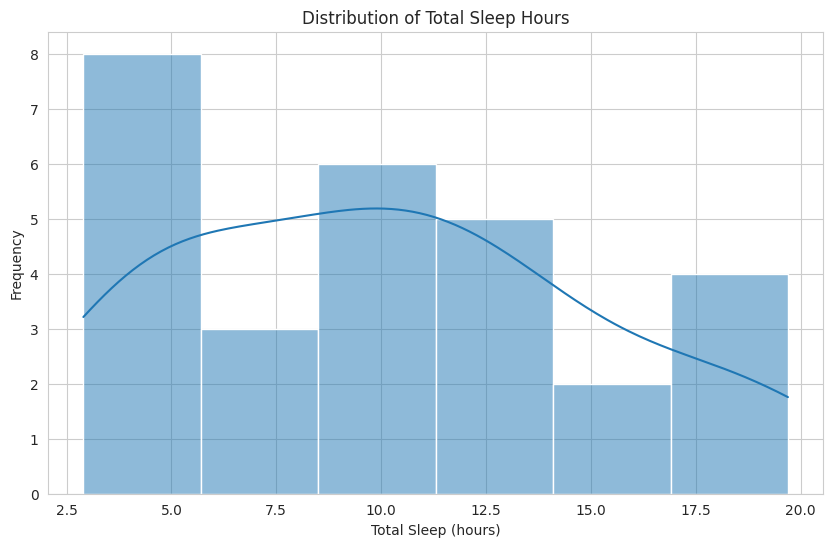

In [33]:
sns.set_style("whitegrid")

# Distribution of Total Sleep
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['TotalSleep'], kde=True)
plt.title('Distribution of Total Sleep Hours')
plt.xlabel('Total Sleep (hours)')
plt.ylabel('Frequency')
plt.show()

* Distribution Shape: The histogram shows the frequency of total sleep hours across different bins. It seems to be somewhat right-skewed, indicating that a larger number of species sleep less than the average, with fewer species sleeping more.

* Central Tendency: The peak of the KDE suggests that the most common range of sleep hours is around 8 to 10 hours.

* Spread of Data: There is a wide spread in the data, with sleep hours ranging from around 2.5 to over 17.5 hours.

* Outliers: The histogram indicates that there are few species that sleep very little or a lot compared to the rest.

* Variability in Sleep: There is significant variability in sleep duration among species. This could be due to a variety of ecological, biological, and evolutionary factors.
* Skewness: The right skewness of the distribution suggests that while most species sleep for a moderate amount of time, there are some that sleep considerably more than the rest.

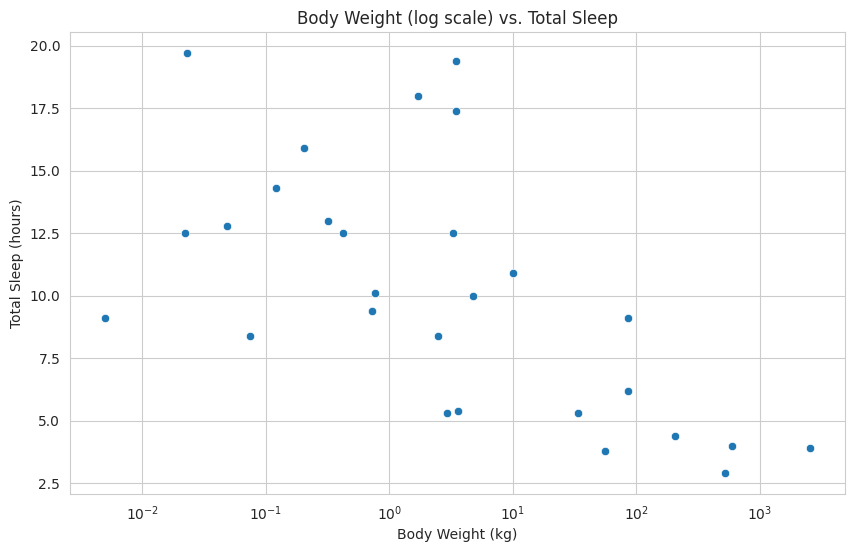

In [34]:
# Relationship between Body Weight and Total Sleep
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BodyWt', y='TotalSleep', data=df_clean)
plt.xscale('log')
plt.title('Body Weight (log scale) vs. Total Sleep')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Total Sleep (hours)')
plt.show()


* **Trend**: The plot does not show a clear linear relationship between body weight and total sleep hours. However, there seems to be a weak trend where species with a larger body weight tend to sleep less, as indicated by the general downward trajectory when moving from left to right across the plot.

* **Variability**: There's considerable variability in sleep duration at lower body weights. This variability seems to decrease as body weight increases, with heavy species showing less variation in total sleep hours.

* **Size and Sleep**: The graph suggests that smaller mammals have a wider range of total sleep hours, whereas larger mammals seem to have a narrower range and tend to sleep less.
* **Adaptation**: The sleep patterns may be an adaptation to ecological niches. For example, smaller mammals might have more predators and thus have evolved to have a wide range of sleep patterns to adapt to different threats and environments.

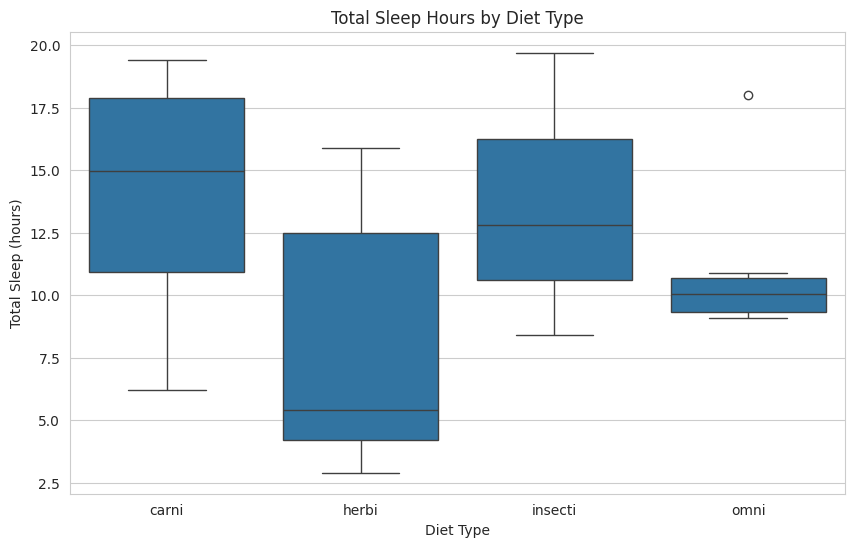

In [35]:
# Boxplots of Sleep by Diet Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vore', y='TotalSleep', data=df_clean)
plt.title('Total Sleep Hours by Diet Type')
plt.xlabel('Diet Type')
plt.ylabel('Total Sleep (hours)')
plt.show()

* Diet and Sleep: There appears to be a link between the diet type of a species and its sleep patterns. Omnivores tend to sleep less than herbivores and carnivores on average.
* Variability: Carnivores and insectivores exhibit more variability in sleep duration than herbivores and omnivores.
* Outliers: The presence of outliers, especially in the insectivores, could be of interest for further investigation as these species deviate from the typical patterns within their dietary group.

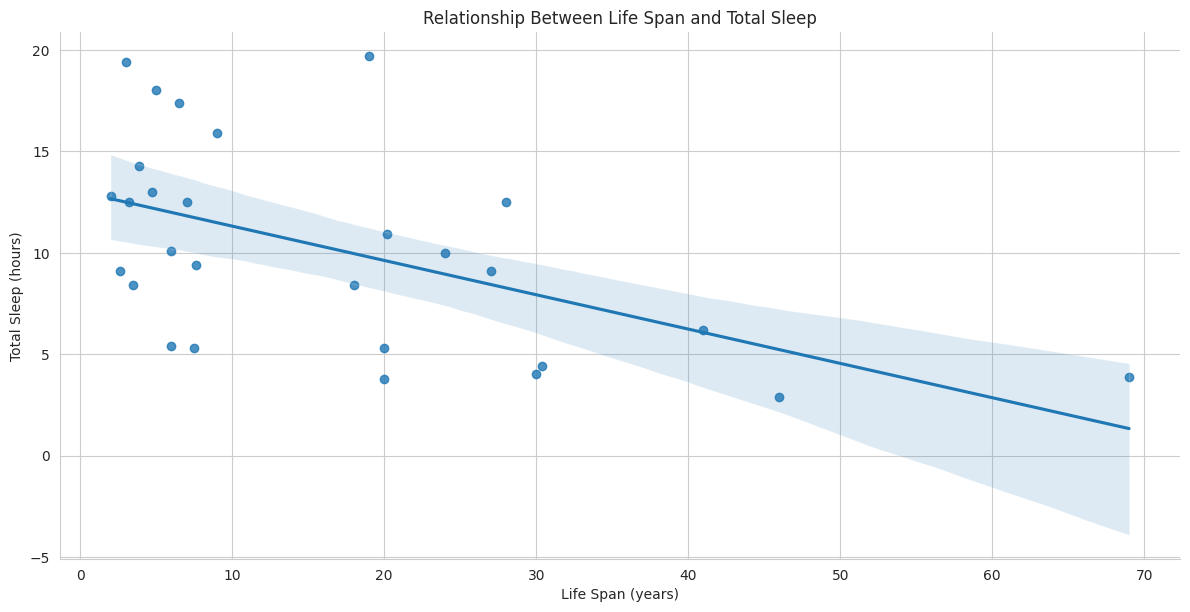

In [36]:
# Sleep and Life Span Relationship
sns.lmplot(x='LifeSpan', y='TotalSleep', data=df_clean, aspect=2, height=6)
plt.title('Relationship Between Life Span and Total Sleep')
plt.xlabel('Life Span (years)')
plt.ylabel('Total Sleep (hours)')
plt.show()

* **Relationship Strength**: The negative slope of the regression line implies that there is a tendency for longer-lived species to have shorter total sleep times. This might suggest that species that live longer have evolved sleep efficiencies or different metabolic or restorative processes.
* **Outliers**: There are a few potential outliers, particularly at the lower end of the Life Span axis, where some species sleep significantly more or less than others with a similar lifespan. These outliers could be species with unique ecological or biological characteristics affecting their sleep patterns.

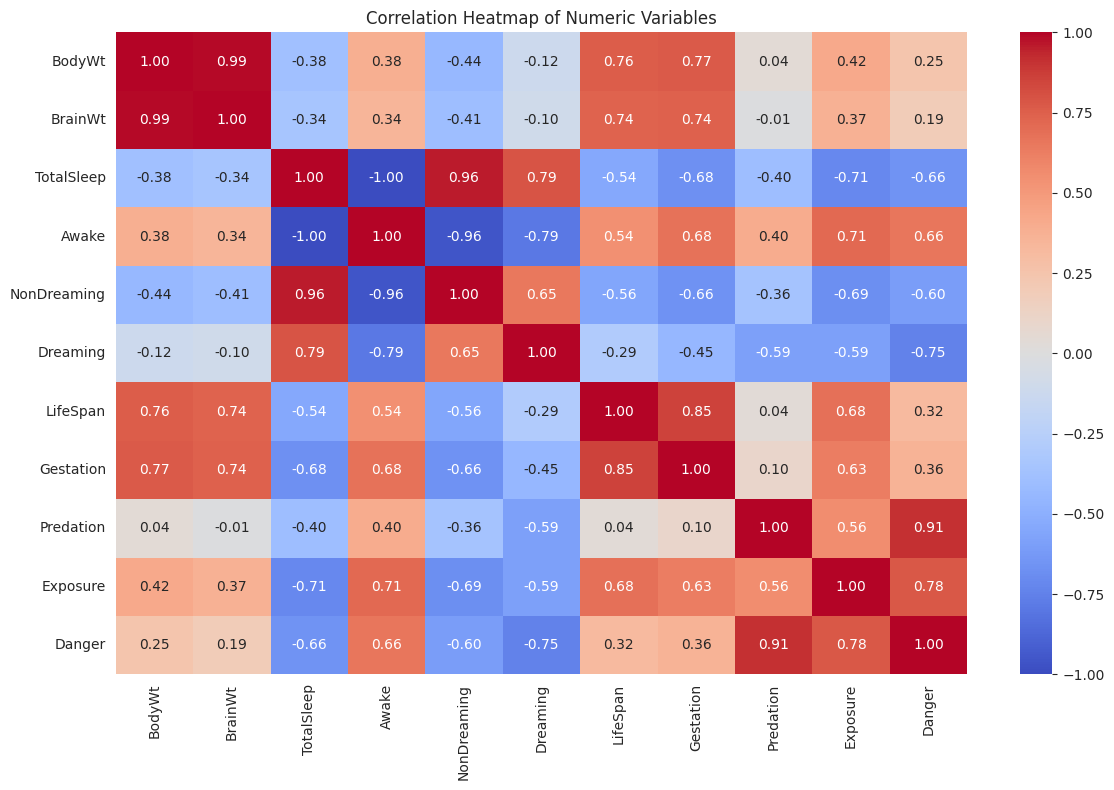

In [37]:
#Heatmap of Correlation Matrix

# Select only the numeric columns for the correlation matrix
numeric_df = df_clean.select_dtypes(include=[np.number])


plt.figure(figsize=(12, 8))

corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

* Total Sleep and Other Variables: Total Sleep has a strong negative correlation with Awake (-1.00 as expected, since more sleep means less time awake) and a moderate negative correlation with Exposure (-0.66), suggesting that species that are more exposed to danger might sleep less.

* NonDreaming and Dreaming Sleep: NonDreaming and Dreaming sleep are positively correlated (0.65) with each other, indicating that species that tend to have more of one type of sleep also tend to have more of the other.

* Life Span and Gestation: There is a strong positive correlation between LifeSpan and Gestation (0.85), indicating that species with longer gestation periods tend to have longer lifespans.

* Ecological Factors: Predation, Exposure, and Danger all have strong positive correlations with each other (0.91 to 1.00), suggesting that these ecological risks are closely linked.

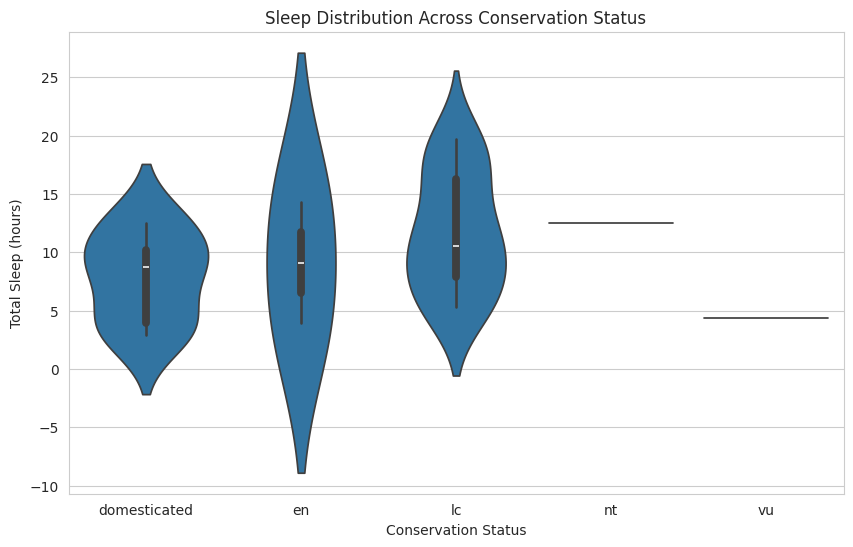

In [38]:
# Conservation Status and Sleep Patterns
plt.figure(figsize=(10, 6))
sns.violinplot(x='Conservation', y='TotalSleep', data=df_clean)
plt.title('Sleep Distribution Across Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Total Sleep (hours)')
plt.show()

Each 'violin' represents the distribution of sleep hours for a conservation category. The width of each violin shows the density of the data points at different sleep amounts, with wider sections indicating a higher density of species.

* Variation in Sleep: There is considerable variation within each conservation status, as evidenced by the spread and shape of the violins.

* Domesticated Species: The domesticated category shows a wide distribution of sleep times, with a slight skew towards more sleep. This could suggest that domesticated animals, due to their protective environment, may have more liberty in their sleep patterns.

* Endangered Species (en): The violin for endangered species is quite narrow, indicating that most endangered species have a similar amount of total sleep, centered around 10 hours.

* Least Concern (lc): The "lc" category has a broad distribution, implying a wide range of sleep hours among species that are not considered at risk.

* Near Threatened (nt): The "nt" category has a slightly narrower distribution than "lc" but still shows considerable variation.

* Vulnerable (vu): The "vu" category appears to have a broader distribution of sleep hours, similar to "domesticated", indicating variability in sleep patterns among these species.

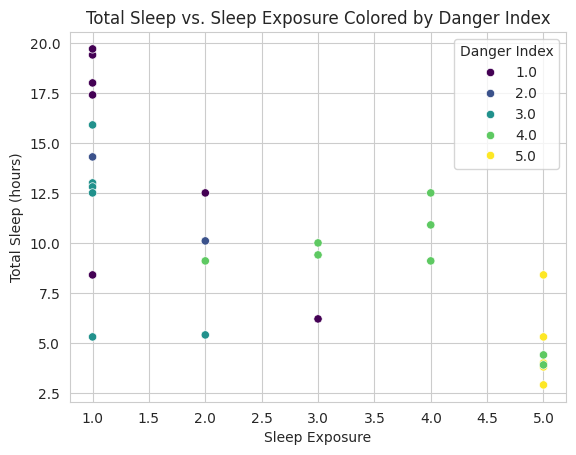

In [39]:
#Danger Index and Sleep Exposure
sns.scatterplot(x='Exposure', y='TotalSleep', hue='Danger', data=df_clean, palette='viridis')
plt.title('Total Sleep vs. Sleep Exposure Colored by Danger Index')
plt.xlabel('Sleep Exposure')
plt.ylabel('Total Sleep (hours)')
plt.legend(title='Danger Index')
plt.show()


*  There doesn't appear to be a strong linear relationship between sleep exposure and total sleep. However, there is a noticeable pattern where species with higher sleep exposure (4 and 5) seem to have a more varied range of total sleep hours.

* Species with the least sleep exposure (1) tend to sleep more, as seen by the clustering of points in the higher region of the y-axis. This might suggest that species sleeping in well-protected environments afford to sleep longer.

* Species with a higher danger index (4 and 5), which are colored in lighter shades, do not show a clear pattern of reduced sleep, which one might expect. Instead, they are distributed across the spectrum of total sleep hours.



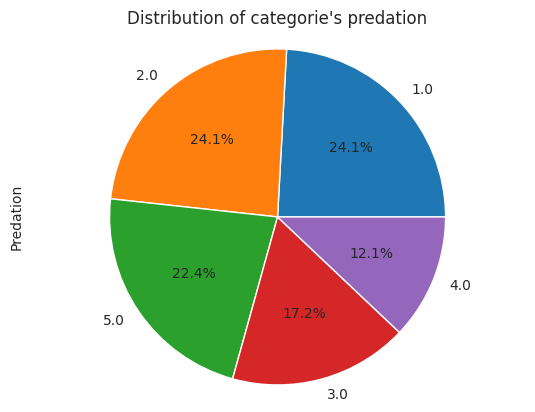

In [40]:
#Distribution of Categorie's predation

df_original["Predation"].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title("Distribution of categorie's predation")
plt.show()
#We can see categorie 1,2 and 5 represent 3/4 of the population and 3,4 just 1/4.



*   The pie chart shows five categories of predation, with each slice representing the proportion of the population falling into each category.
*   Categories 1 and 2 are the most common, each constituting 24.1% of the population. This suggests that many species fall into the lower predation risk categories.
*   Category 3 makes up 17.2% of the population, which is slightly less than categories 1 and 2 but still represents a significant portion.
*   Categories 4 and 5, which would represent the highest predation risks, are less common, comprising 12.1% and 22.4% of the population, respectively.  

This pie chart provides a snapshot of how predation risk is distributed among species in the dataset. It invites us to consider the broader ecological and evolutionary narratives that underlie these numbers, pushing us to think about the multifaceted nature of survival in the animal kingdom.

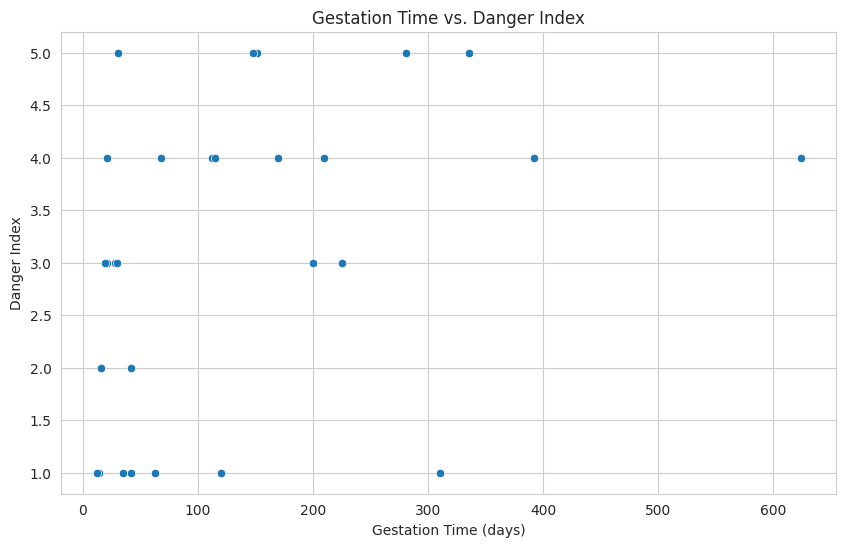

In [41]:
# Scatter plot of Gestation vs. Danger Index

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Gestation', y='Danger', data=df_clean)

plt.title('Gestation Time vs. Danger Index')
plt.xlabel('Gestation Time (days)')
plt.ylabel('Danger Index')

plt.show()

* There is no immediately obvious linear correlation between longer gestation periods and higher or lower danger indexes, as the points do not form a clear trend.

* The danger index appears to be concentrated between values 2 and 4 regardless of gestation time, suggesting that factors other than gestation may be more significant in determining an animal's danger index.

* Some mammals with very short gestation times have a higher danger index, while some with longer gestation times have a lower danger index.However, there are mammals with long gestation times that also exhibit a high danger index, indicating variability that could be explored further.

* The spread of points suggests that the gestation period is not a sole predictor of the danger index. This implies that an animal's risk of predation or other dangers is not solely dependent on the length of its gestation period.

# Principal Component Analysis

In [102]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            87 non-null     object 
 1   Genus              87 non-null     object 
 2   Order              87 non-null     object 
 3   Vore               87 non-null     object 
 4   Conservation       58 non-null     object 
 5   BodyWt             87 non-null     float64
 6   BrainWt            87 non-null     float64
 7   TotalSleep         87 non-null     float64
 8   Awake              87 non-null     float64
 9   NonDreaming        47 non-null     float64
 10  Dreaming           63 non-null     float64
 11  LifeSpan           54 non-null     float64
 12  Gestation          54 non-null     float64
 13  Predation          58 non-null     float64
 14  Exposure           58 non-null     float64
 15  Danger             58 non-null     float64
 16  categorie_sleeper  87 non-nu

In [103]:
df_cleaned = df_original.dropna()
df_cleaned = df_cleaned.select_dtypes(include='float64')


In [104]:

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_cleaned)
df_scaled[:10]

array([[ 0.93170015,  0.20588408, -1.25971979,  1.25971979, -1.29911081,
        -0.85730087,  0.83946368,  1.00765489,  1.10276036,  1.40806153,
         1.34164079],
       [-0.30653256, -0.28436304, -0.15618774,  0.15618774, -0.20000699,
        -0.79413133, -0.5839254 , -0.48301949,  1.10276036,  0.19496237,
         0.64597519],
       [-0.30716895, -0.28330622,  0.4773214 , -0.4773214 ,  0.742082  ,
        -0.35194457, -0.62205189, -0.17508675,  1.10276036,  0.80151195,
         0.64597519],
       [ 0.76846813,  0.47830882, -1.48451335,  1.48451335, -1.58697133,
        -0.79413133,  1.85617016,  1.39257081,  1.10276036,  1.40806153,
         1.34164079],
       [-0.30121822, -0.26076072,  0.4773214 , -0.4773214 ,  0.71591286,
         0.97461572,  0.71237537, -0.51801185, -1.704266  , -0.41158722,
        -1.44102159],
       [-0.3028712 , -0.27661302, -0.36054552,  0.36054552, -0.17383785,
        -0.73096179,  0.07693382, -0.74196293,  1.10276036,  1.40806153,
         1.341

In [105]:
pca = PCA(n_components=4)
pca.fit(df_scaled)

pca.explained_variance_ratio_.cumsum()

array([0.59685167, 0.81876864, 0.9079332 , 0.94868572])

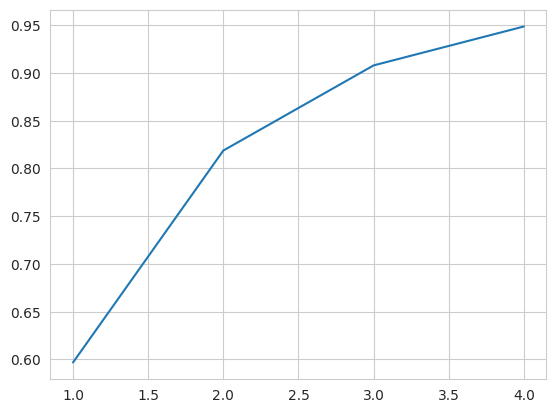

In [106]:
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum())
plt.xlabel = "n_components"
plt.ylabel = "% of variance"
#Ankle technic show us we could take 2 commponents.

In [107]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
pca.explained_variance_ratio_.cumsum()

array([0.59685167, 0.81876864])

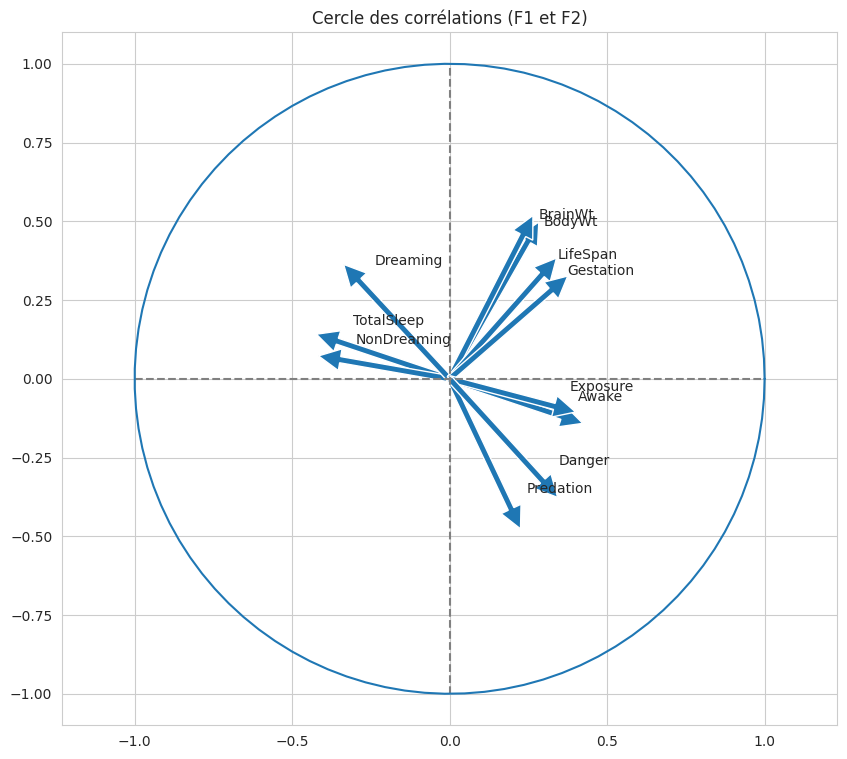

In [108]:
features = df_cleaned.columns
features

x, y = 0,1

fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07,
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')




plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
plt.show(block=False)
#This PCA show us that Dreaming/Non Dreaming/Total Sleep could belong to an influencial group,
#Exposure/awake/danger/predation have a negativ coefficient correlation to this variable groupe (they increase = the other groupe decrease)

In [109]:
db_projected = pca.transform(df_scaled)


def display_factorial_planes(   db_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[6,6]):

    db_ = np.array(db_projected)

    if not figsize:
        figsize = (6,6)

    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= db_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    x, y = x_y

    fig, ax = plt.subplots(1, 1, figsize=figsize)

    c = None if clusters is None else clusters

    sns.scatterplot(data=None, x=db_[:, x], y=db_[:, y], hue=c)

    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')


    x_max = np.abs(db_[:, x]).max() *1.1
    y_max = np.abs(db_[:, y]).max() *1.1

    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)


    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)


    if len(labels) :
        for i,(_x,_y) in enumerate(db_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


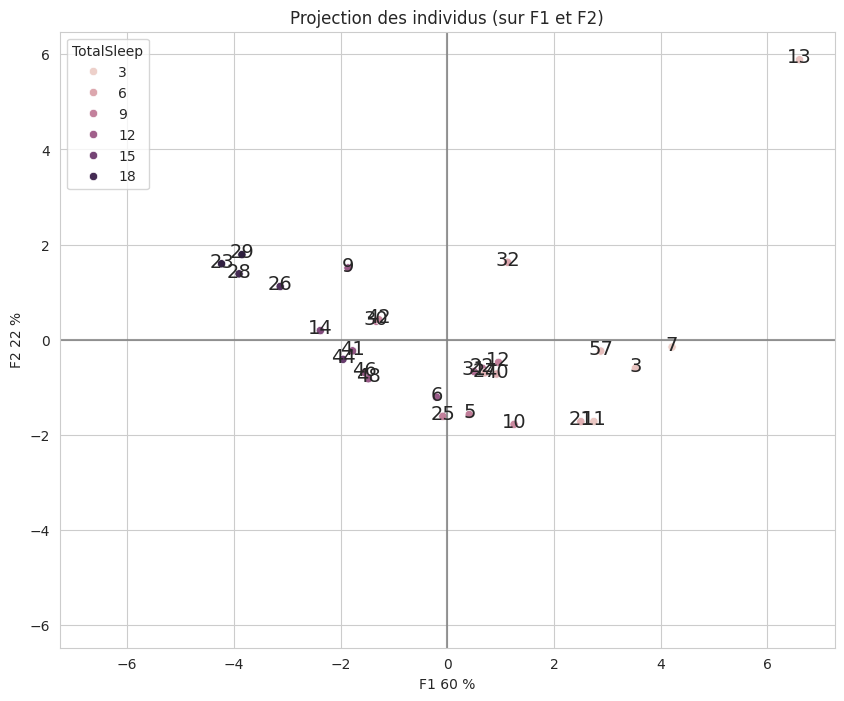

In [113]:
names = df_cleaned.index
names

x_y = [0,1]
display_factorial_planes(db_projected, x_y, pca, labels=names, figsize=(10,8), clusters=df_cleaned['TotalSleep'])
#Individual projection of Total Sleep follow direction of previously seen correlation variable vector on F1/F2

# Correlation Analysis on Sleeping Attributes


In [117]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

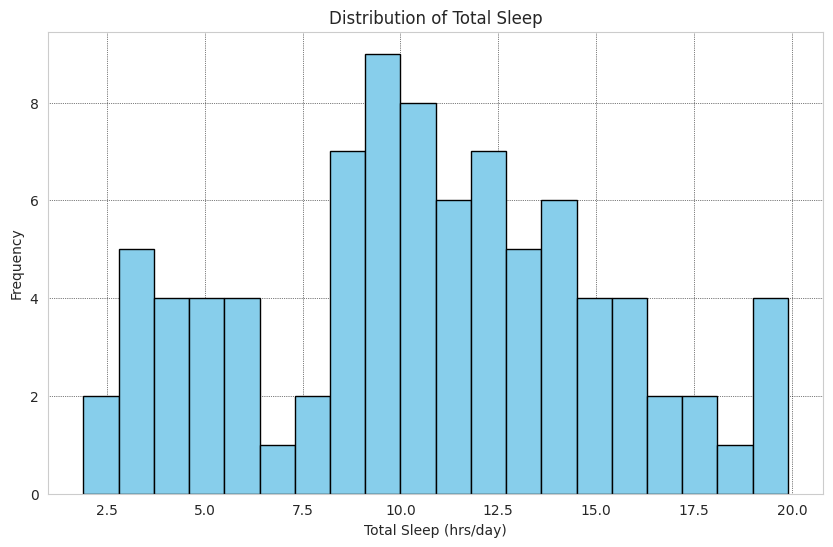

In [118]:
plt.figure(figsize=(10, 6))
plt.hist(df_original['TotalSleep'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Sleep (hrs/day)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sleep')
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

In [53]:
def categorize_sleep(TotalSleep):
    if  TotalSleep < 8:
        return 'Low sleeper'
    elif 8 <= TotalSleep <= 15:
        return 'Medium sleeper'
    else:
        return 'Big sleeper'

df_original['categorie_sleeper'] = df_original['TotalSleep'].apply(categorize_sleep)

display(df_original)
#group formation to check distribution

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,categorie_sleeper
0,Giraffe,Giraffa,Artiodactyla,herbi,cd,899.995,680.0,1.9,22.10,NaN,0.3,28.0,400.0,5.0,5.0,5.0,Low sleeper
1,Pilot whale,Globicephalus,Cetacea,carni,cd,800.000,0.0,2.7,21.35,NaN,0.1,NaN,NaN,NaN,NaN,NaN,Low sleeper
2,Gorilla,Gorilla,Primates,herbi,cr,207.000,406.0,12.0,12.00,NaN,NaN,39.3,252.0,1.0,4.0,1.0,Medium sleeper
3,Cow,Bos,Artiodactyla,herbi,domesticated,600.000,423.0,4.0,20.00,3.2,0.7,30.0,281.0,5.0,5.0,5.0,Low sleeper
4,Dog,Canis,Carnivora,carni,domesticated,14.000,70.0,10.1,13.90,NaN,2.9,NaN,NaN,NaN,NaN,NaN,Medium sleeper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Tenrec,Tenrec,Afrosoricida,omni,NaN,0.900,2.6,15.6,8.40,11.0,2.3,4.5,60.0,2.0,1.0,2.0,Big sleeper
83,Tree shrew,Tupaia,Scandentia,omni,NaN,0.104,2.5,8.9,15.10,13.2,2.6,2.3,46.0,3.0,2.0,2.0,Medium sleeper
84,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.330,0.0,5.2,18.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low sleeper
85,Red fox,Vulpes,Carnivora,carni,NaN,4.230,50.4,9.8,14.20,7.4,2.4,9.8,52.0,1.0,1.0,1.0,Medium sleeper


In [54]:
from scipy.stats import shapiro

sleep_categorie_normality = shapiro(df_original['TotalSleep'])


print("Normality Shapiro-Wilk test for 'total sleep':")
print("Statistic test:", sleep_categorie_normality.statistic)
print("P-value:", sleep_categorie_normality.pvalue)
print("Data are correctly distributed:", sleep_categorie_normality.pvalue > 0.05)

Normality Shapiro-Wilk test for 'total sleep':
Statistic test: 0.9800111055374146
P-value: 0.19812870025634766
Data are correctly distributed: True


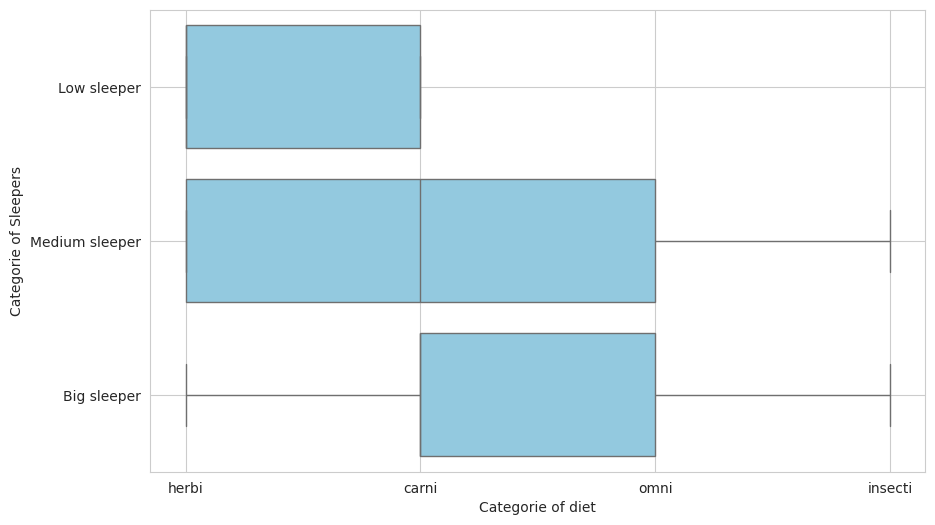

In [119]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='categorie_sleeper', x='Vore', data=df_original, orient='h', color='skyblue')
plt.xlabel('Categorie of diet')
plt.ylabel('Categorie of Sleepers')

plt.grid(True)
plt.show()

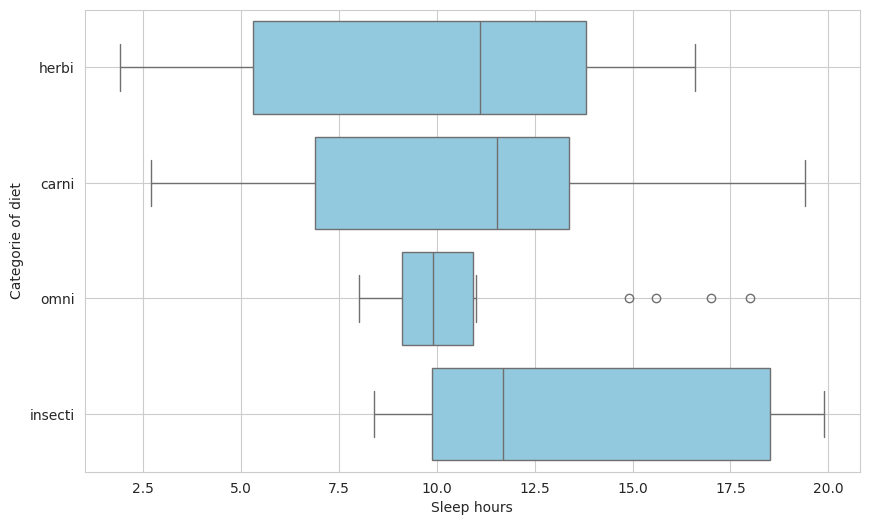

In [120]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot( y='Vore', x='TotalSleep', data=df_original, orient='h', color='skyblue')
plt.xlabel('Sleep hours')
plt.ylabel('Categorie of diet')

plt.grid(True)
plt.show()
#We can see a correlation for every group :
#Majority of Herbivore are beetween Low and medium sleeper.
#Carnivore have pratiqly the same distribution but more centred : few are big sleeper but less are low sleeper.
#Omnivore tend to have a medium to big sleep.
#Only inscet have a majority of big sleeper among them.



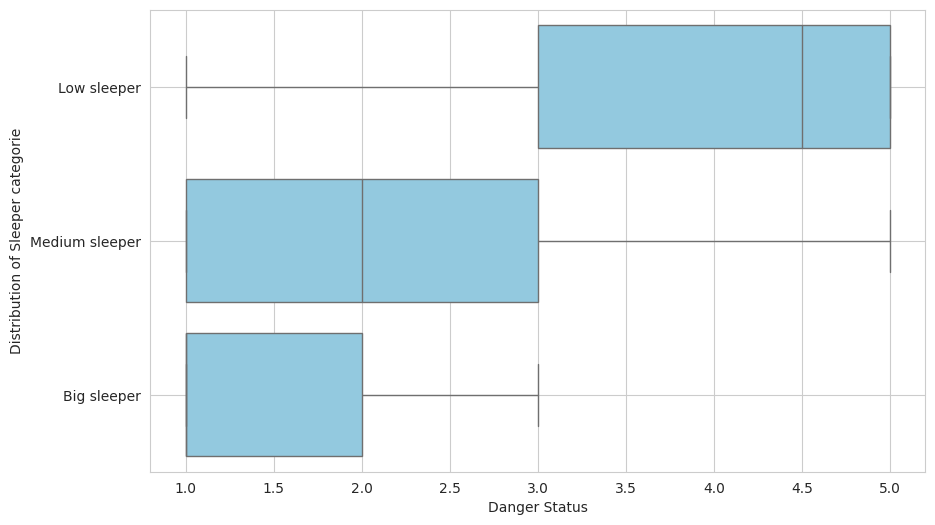

In [121]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='categorie_sleeper', x='Danger', data=df_original, orient='h', color='skyblue')
plt.xlabel('Danger Status')
plt.ylabel('Distribution of Sleeper categorie')

plt.grid(True)
plt.show()
#We can observe a correlation between the most endangered groups and a decrease in the total sleep value.
#Therefore, it is inferred that the more an animal belongs to an endangered group, the less it sleeps.

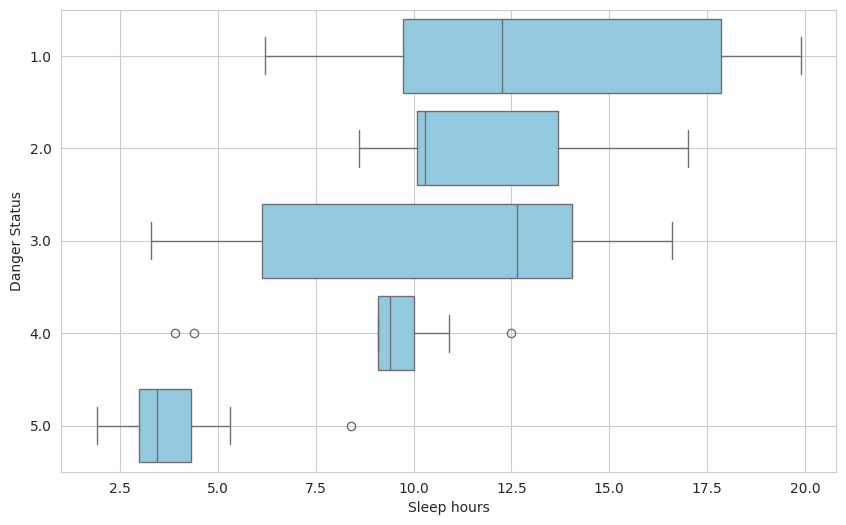

In [122]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='Danger', x='TotalSleep', data=df_original, orient='h', color='skyblue')
plt.xlabel('Sleep hours')
plt.ylabel('Danger Status')

plt.grid(True)
plt.show()

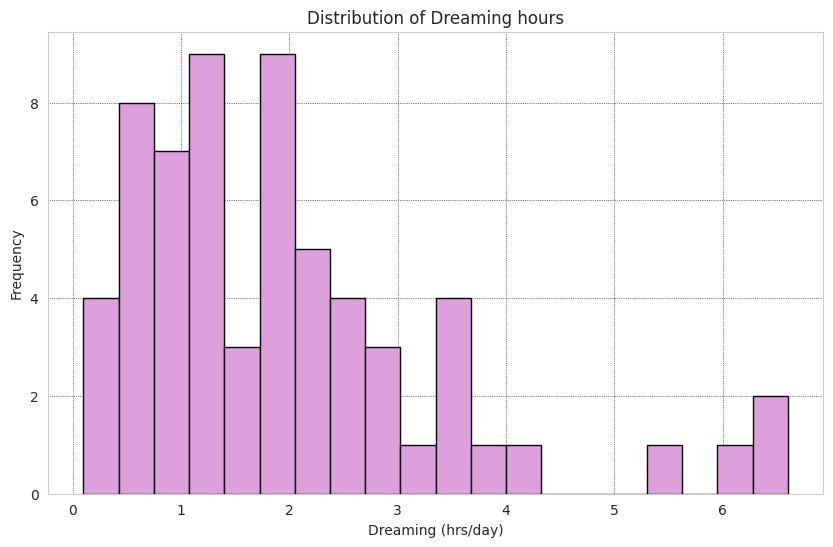

In [123]:
plt.figure(figsize=(10, 6))
plt.hist(df_original['Dreaming'], bins=20, color='plum', edgecolor='black')
plt.xlabel('Dreaming (hrs/day)')
plt.ylabel('Frequency')
plt.title('Distribution of Dreaming hours')
plt.grid(color='black', linestyle=':', linewidth=0.5)
plt.show()

In [124]:
dreaming_categorie_normality = shapiro(df_original['Dreaming'])


print("Normality Shapiro-Wilk test for 'dreaming':")
print("Statistic test:", dreaming_categorie_normality.statistic)
print("P-value:", dreaming_categorie_normality.pvalue)
print("Data are correctly distributed:", dreaming_categorie_normality.pvalue > 0.05)

Normality Shapiro-Wilk test for 'dreaming':
Statistic test: nan
P-value: 1.0
Data are correctly distributed: True


In [58]:
df_original.describe()
#We can observe with numbers the distribution of dreaming value regarding quarter of percentage

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,63.000000,54.000000,54.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.979365,20.240741,139.268519,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.474204,18.757011,144.696322,1.496214,1.575005,1.426989
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,2.000000,12.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,6.125000,36.750000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,15.100000,79.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.500000,28.000000,195.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


In [59]:
def categorize_dream(Dreaming):
    if  Dreaming < 2:
        return 'Low dreamer'
    elif 2 <= Dreaming <= 3:
        return 'Medium dreamer'
    else:
        return 'Big dreamer'

df_original['categorie_dreamer'] = df_original['Dreaming'].apply(categorize_dream)

display(df_original)
#group formation to check distribution

,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,categorie_sleeper,categorie_dreamer
0,Giraffe,Giraffa,Artiodactyla,herbi,cd,899.995,680.0,1.9,22.10,NaN,0.3,28.0,400.0,5.0,5.0,5.0,Low sleeper,Low dreamer
1,Pilot whale,Globicephalus,Cetacea,carni,cd,800.000,0.0,2.7,21.35,NaN,0.1,NaN,NaN,NaN,NaN,NaN,Low sleeper,Low dreamer
2,Gorilla,Gorilla,Primates,herbi,cr,207.000,406.0,12.0,12.00,NaN,NaN,39.3,252.0,1.0,4.0,1.0,Medium sleeper,Big dreamer
3,Cow,Bos,Artiodactyla,herbi,domesticated,600.000,423.0,4.0,20.00,3.2,0.7,30.0,281.0,5.0,5.0,5.0,Low sleeper,Low dreamer
4,Dog,Canis,Carnivora,carni,domesticated,14.000,70.0,10.1,13.90,NaN,2.9,NaN,NaN,NaN,NaN,NaN,Medium sleeper,Medium dreamer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Tenrec,Tenrec,Afrosoricida,omni,NaN,0.900,2.6,15.6,8.40,11.0,2.3,4.5,60.0,2.0,1.0,2.0,Big sleeper,Medium dreamer
83,Tree shrew,Tupaia,Scandentia,omni,NaN,0.104,2.5,8.9,15.10,13.2,2.6,2.3,46.0,3.0,2.0,2.0,Medium sleeper,Medium dreamer
84,Bottle-nosed dolphin,Tursiops,Cetacea,carni,NaN,173.330,0.0,5.2,18.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low sleeper,Big dreamer
85,Red fox,Vulpes,Carnivora,carni,NaN,4.230,50.4,9.8,14.20,7.4,2.4,9.8,52.0,1.0,1.0,1.0,Medium sleeper,Medium dreamer


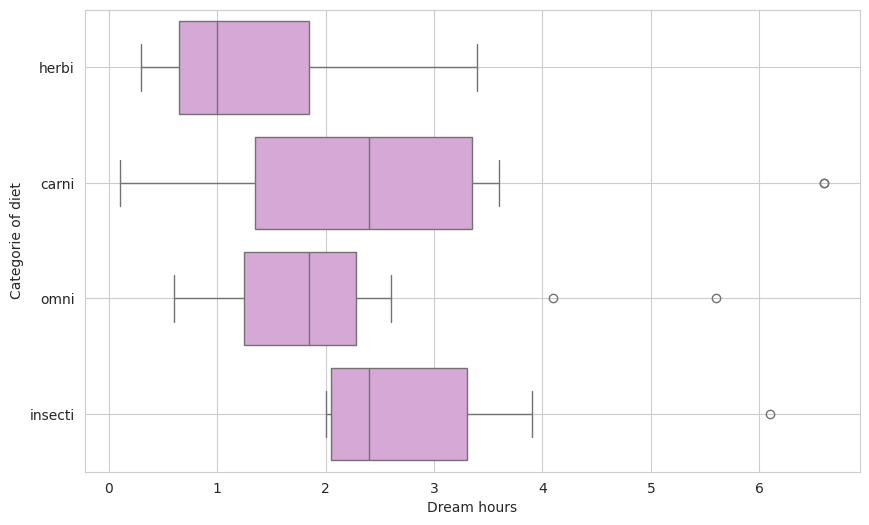

In [125]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='Vore', x='Dreaming', data=df_original, orient='h',color='plum')
plt.xlabel('Dream hours')
plt.ylabel('Categorie of diet')
plt.grid(True)
plt.show()
#Carnivore and insect have the highest amount of dreaming hours, herbivore have the lowest.

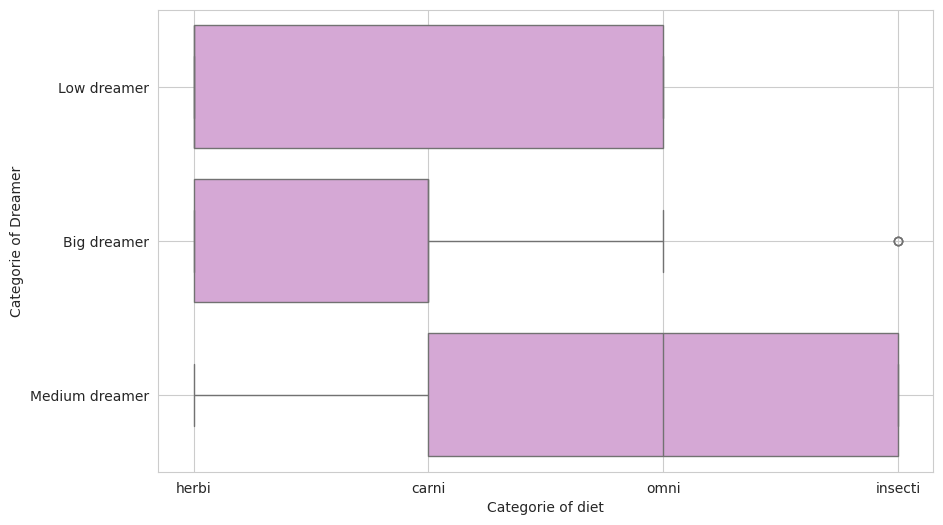

In [126]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='categorie_dreamer', x='Vore', data=df_original, orient='h', color='plum')
plt.xlabel('Categorie of diet')
plt.ylabel('Categorie of Dreamer')

plt.grid(True)
plt.show()

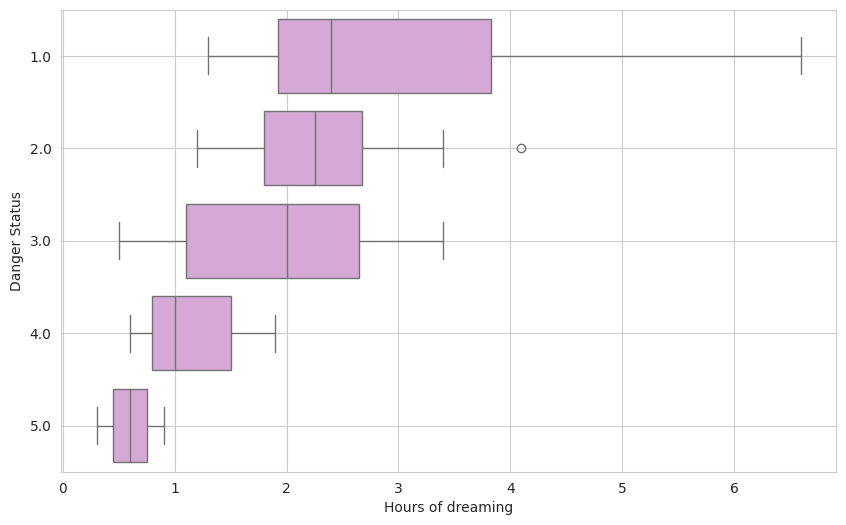

In [127]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='Danger', x='Dreaming', data=df_original, orient='h', color='plum')
plt.ylabel('Danger Status')
plt.xlabel('Hours of dreaming')

plt.grid(True)
plt.show()
#Animal with low danger of predation have a meaning of more dreaming hours.


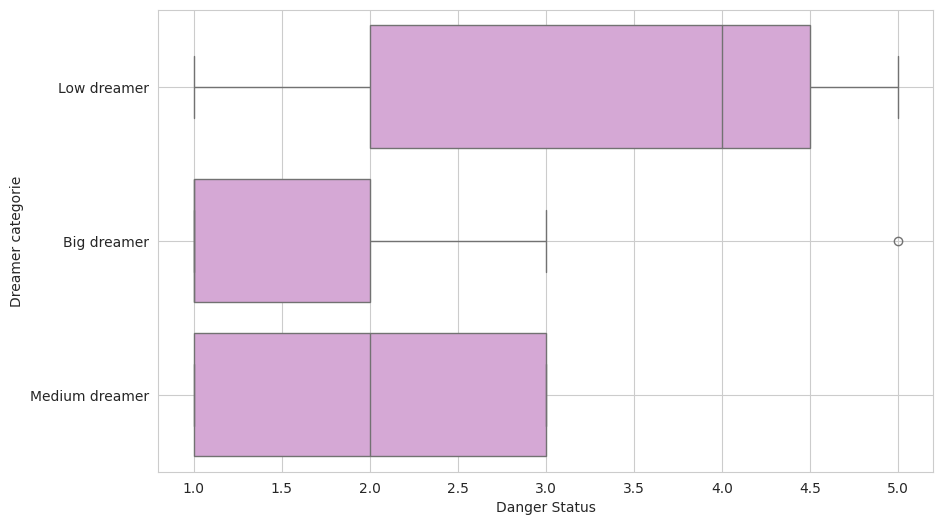

In [128]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='categorie_dreamer', x='Danger', data=df_original, orient='h', color='plum')
plt.xlabel('Danger Status')
plt.ylabel('Dreamer categorie')

plt.grid(True)
plt.show()

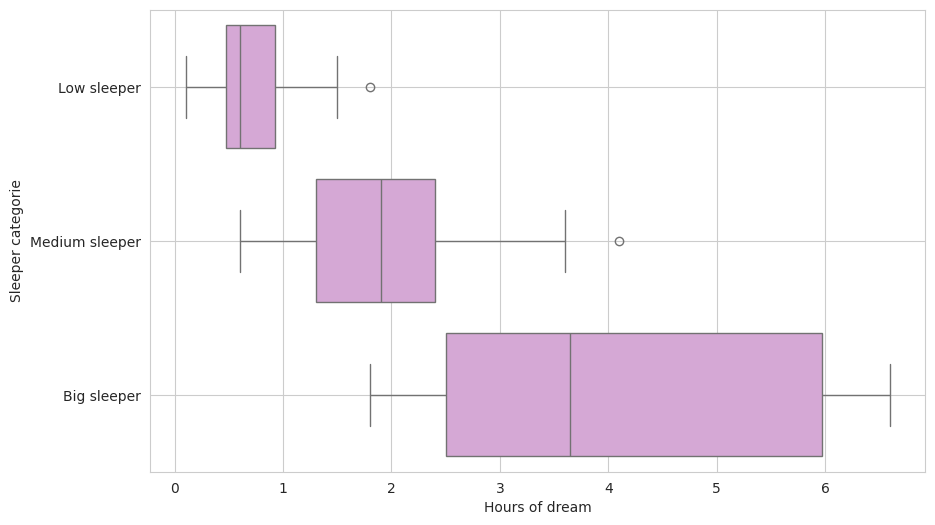

In [129]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='categorie_sleeper', x='Dreaming', data=df_original, orient='h', color='plum')
plt.xlabel('Hours of dream')
plt.ylabel('Sleeper categorie')

plt.grid(True)
plt.show()

# Model Training

Motivation for selected model, comparison of different models and
evaluation :

The selection of Ordinary Least Squares (OLS) regression, Random Forest, and Gaussian Naive Bayes for predicting sleeping variables in mammals stems from their diverse strengths and suitability for the task.

1. OLS regression is chosen for its simplicity and interpretability, making it well-suited for exploring linear relationships between predictor variables and sleeping patterns.

2. Random Forest is selected due to its robustness in handling complex datasets and nonlinear relationships, providing stable predictions while mitigating overfitting through ensemble learning.

3. Gaussian Naive Bayes offers computational efficiency and interpretability, making it suitable for situations where simplicity is preferred, albeit with the assumption of feature independence.

4. Evaluation will be conducted using classification metrics such as accuracy, precision, recall, and F1-score, with interpretation focusing on understanding model behavior through confusion matrices and feature importance analysis.

The goal is to identify the most effective approach for predicting sleeping variables in mammals while considering model interpretability and performance in handling the complexities of mammalian sleep patterns.

<ipython-input-62-07510f7f0a57>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_original.corr()


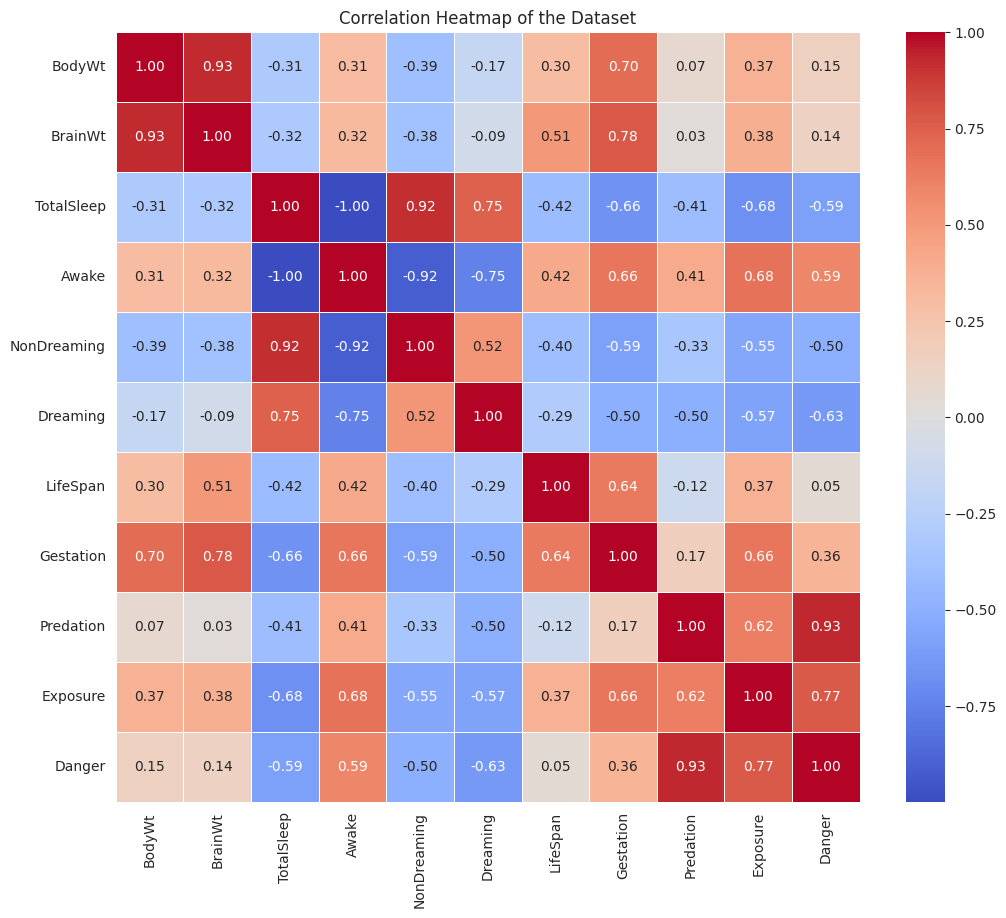

In [62]:
correlation_matrix = df_original.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of the Dataset')
plt.show()

In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [64]:
nan_count_per_column = df_original.isna().sum()
total_nan_count = df_original.isna().sum().sum()
print("NaN count per column:")
print(nan_count_per_column)
print("\nTotal NaN count in the DataFrame:", total_nan_count)

NaN count per column:
Species               0
Genus                 0
Order                 0
Vore                  0
Conservation         29
BodyWt                0
BrainWt               0
TotalSleep            0
Awake                 0
NonDreaming          40
Dreaming             24
LifeSpan             33
Gestation            33
Predation            29
Exposure             29
Danger               29
categorie_sleeper     0
categorie_dreamer     0
dtype: int64

Total NaN count in the DataFrame: 246


In [130]:
# Drop any rows with missing values
data = df

data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 3 to 57
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Species       28 non-null     object 
 1   Genus         28 non-null     object 
 2   Order         28 non-null     object 
 3   Vore          28 non-null     object 
 4   Conservation  28 non-null     object 
 5   BodyWt        28 non-null     float64
 6   BrainWt       28 non-null     float64
 7   TotalSleep    28 non-null     float64
 8   Awake         28 non-null     float64
 9   NonDreaming   28 non-null     float64
 10  Dreaming      28 non-null     float64
 11  LifeSpan      28 non-null     float64
 12  Gestation     28 non-null     float64
 13  Predation     28 non-null     float64
 14  Exposure      28 non-null     float64
 15  Danger        28 non-null     float64
dtypes: float64(11), object(5)
memory usage: 3.7+ KB


## Ordinary Least Squares

In [131]:
reg_multi = smf.ols('TotalSleep~BodyWt+BrainWt+NonDreaming+Dreaming+LifeSpan+Gestation+Predation+Exposure', data=data).fit()
print(reg_multi.summary())
#Awake value is not part of the modeling because coefficient is perfectly related, there is a risk of overfitting.
#We need to remove column with high p-value from the train model.

                            OLS Regression Results                            
Dep. Variable:             TotalSleep   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     132.0
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           5.37e-15
Time:                        22:59:05   Log-Likelihood:                -27.694
No. Observations:                  28   AIC:                             73.39
Df Residuals:                      19   BIC:                             85.38
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1998      1.052     -0.190      

In [132]:
reg_multi = smf.ols('TotalSleep~BodyWt+BrainWt+NonDreaming+Dreaming+Predation+Exposure', data=data).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSleep   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     186.3
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           4.29e-17
Time:                        22:59:06   Log-Likelihood:                -28.287
No. Observations:                  28   AIC:                             70.57
Df Residuals:                      21   BIC:                             79.90
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4743      0.810     -0.586      

In [133]:
reg_multi = smf.ols('TotalSleep~NonDreaming+Dreaming+Predation', data=data).fit()
print(reg_multi.summary())
#Essential values with the lowest p-value and a high r-square

                            OLS Regression Results                            
Dep. Variable:             TotalSleep   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     351.6
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           5.87e-20
Time:                        22:59:07   Log-Likelihood:                -30.914
No. Observations:                  28   AIC:                             69.83
Df Residuals:                      24   BIC:                             75.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.9979      0.677     -1.474      

In [134]:
X_rl = data[['NonDreaming', 'Dreaming', 'Predation']]
y_rl = data["TotalSleep"]

# Divide the data into training and test sets.
xtrain_rl, xtest_rl, ytrain_rl, ytest_rl = train_test_split(X_rl, y_rl, test_size=0.2, random_state=42)

# Add a constant column to the explanatory variables for Statsmodels.
xtrain_rl = sm.add_constant(xtrain_rl)
xtest_rl = sm.add_constant(xtest_rl)

# Create the linear regression model with Sm.
model = sm.OLS(ytrain_rl, xtrain_rl).fit()

# Obtain predictions on the test set.
y_pred_rl = model.predict(xtest_rl)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalSleep   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     182.4
Date:                Sat, 02 Mar 2024   Prob (F-statistic):           1.17e-13
Time:                        22:59:07   Log-Likelihood:                -26.770
No. Observations:                  22   AIC:                             61.54
Df Residuals:                      18   BIC:                             65.90
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9998      0.883     -1.132      

In [135]:
r2 = r2_score(ytest_rl, y_pred_rl)

print(f"R-squared: {r2}")

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ytest_rl, y_pred_rl)
print(f"Mean Squared Error (MSE): {mse}")
#The R-squared value is close to 1 (0.9986), suggesting that the model explains the data variability very well.
#Approximately 99.86% of the variance in the target variable (TotalSleep) is explained.
#The MSE is very low (0.0492), indicating that the differences between the model-predicted values and the actual values are very small on average.

R-squared: 0.9985880477696617
Mean Squared Error (MSE): 0.04919555337660878


## Model Training Preparation

In [136]:
df = df.dropna()

In [137]:
from sklearn.preprocessing import LabelEncoder

df_train = df.copy()

label_encoder = LabelEncoder()

columns_encoded = ['Genus', 'Order', 'Vore', 'Conservation']
for column in columns_encoded:
    df_train[column] = label_encoder.fit_transform(df[column])

print(df_train)

                           Species  Genus  Order  Vore  Conservation  \
3                              Cow      0      0     1             0   
5                       Guinea pig      2     11     1             0   
6                       Chinchilla      4     11     1             0   
7                            Horse     12      8     1             0   
9                     Domestic cat     15      1     0             0   
10                          Rabbit     19      7     1             0   
11                           Sheep     20      0     1             0   
12                             Pig     26      0     3             0   
13                  Asian elephant     10     10     1             1   
14                  Golden hamster     17     11     1             1   
21                            Goat      1      0     1             2   
22                          Vervet      3      9     3             2   
23                   Water opossum      5      4     0          

In [138]:
df_train.fillna(df_train.mean())

<ipython-input-138-ed538bbd2903>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.fillna(df_train.mean())


,Species,Genus,Order,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
3,Cow,0,0,1,0,600.000,423.00,4.0,20.0,3.2,0.7,30.0,281.0,5.0,5.0,5.0
5,Guinea pig,2,11,1,0,0.728,5.50,9.4,14.6,7.4,0.8,7.6,68.0,5.0,3.0,4.0
6,Chinchilla,4,11,1,0,0.420,6.40,12.5,11.5,11.0,1.5,7.0,112.0,5.0,4.0,4.0
7,Horse,12,8,1,0,521.000,655.00,2.9,21.1,2.1,0.8,46.0,336.0,5.0,5.0,5.0
9,Domestic cat,15,1,0,0,3.300,25.60,12.5,11.5,10.9,3.6,28.0,63.0,1.0,2.0,1.0
10,Rabbit,19,7,1,0,2.500,12.10,8.4,15.6,7.5,0.9,18.0,31.0,5.0,5.0,5.0
11,Sheep,20,0,1,0,55.500,175.00,3.8,20.2,3.2,0.6,20.0,151.0,5.0,5.0,5.0
12,Pig,26,0,3,0,86.250,180.00,9.1,14.9,6.5,1.9,27.0,115.0,4.0,4.0,4.0
13,Asian elephant,10,10,1,1,2547.000,4603.00,3.9,20.1,2.1,1.8,69.0,624.0,3.0,5.0,4.0
14,Golden hamster,17,11,1,1,0.120,1.00,14.3,9.7,11.0,3.4,3.9,16.0,3.0,1.0,2.0


In [139]:
# Get the names of all columns
column_names = df_train.columns

# Convert the Index object to a list if needed
column_names_list = column_names.tolist()

# Print or use the column names
print(column_names_list)

['Species', 'Genus', 'Order', 'Vore', 'Conservation', 'BodyWt', 'BrainWt', 'TotalSleep', 'Awake', 'NonDreaming', 'Dreaming', 'LifeSpan', 'Gestation', 'Predation', 'Exposure', 'Danger']


In [140]:
df_train.values.reshape(-1, 1)

array([['Cow'],
       [0],
       [0],
       [1],
       [0],
       [600.0],
       [423.0],
       [4.0],
       [20.0],
       [3.2],
       [0.7],
       [30.0],
       [281.0],
       [5.0],
       [5.0],
       [5.0],
       ['Guinea pig'],
       [2],
       [11],
       [1],
       [0],
       [0.728],
       [5.5],
       [9.4],
       [14.6],
       [7.4],
       [0.8],
       [7.6],
       [68.0],
       [5.0],
       [3.0],
       [4.0],
       ['Chinchilla'],
       [4],
       [11],
       [1],
       [0],
       [0.42],
       [6.4],
       [12.5],
       [11.5],
       [11.0],
       [1.5],
       [7.0],
       [112.0],
       [5.0],
       [4.0],
       [4.0],
       ['Horse'],
       [12],
       [8],
       [1],
       [0],
       [521.0],
       [655.0],
       [2.9],
       [21.1],
       [2.1],
       [0.8],
       [46.0],
       [336.0],
       [5.0],
       [5.0],
       [5.0],
       ['Domestic cat'],
       [15],
       [1],
       [0],
       [0],
       [3

In [141]:
df_train.isna().sum()

Species         0
Genus           0
Order           0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Awake           0
NonDreaming     0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       0
Exposure        0
Danger          0
dtype: int64

In [142]:
df_train['TotalSleep'] = df_train['TotalSleep'].astype(int)

## Feature Scaling

In [143]:
X = df_train[['BodyWt', 'BrainWt','Awake', 'NonDreaming', 'Dreaming']]

y = df_train['TotalSleep']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [145]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [146]:
# Fit logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [147]:
# Predict the test set results
y_pred = classifier.predict(X_test)

In [148]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


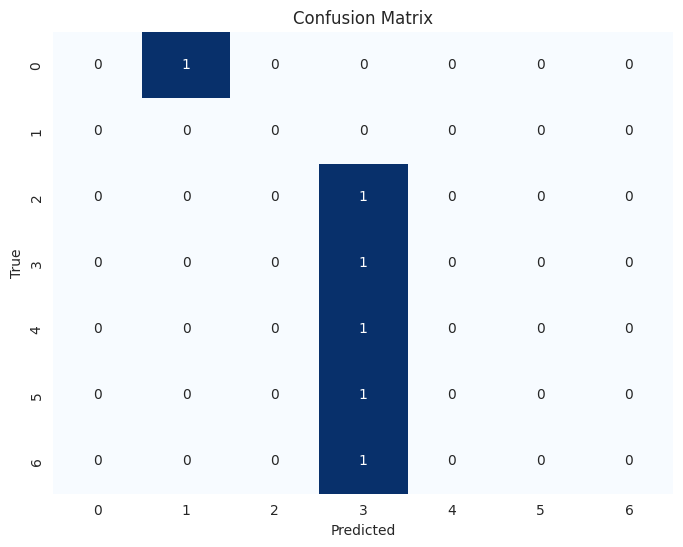

In [149]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Stratified K-Fold cross-validator

In [150]:
from sklearn.model_selection import StratifiedKFold

# Initialize the Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

## Hyperparameter Tuning

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=cv, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on test set: 0.3333333333333333


## Random Forest

In [152]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

In [153]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


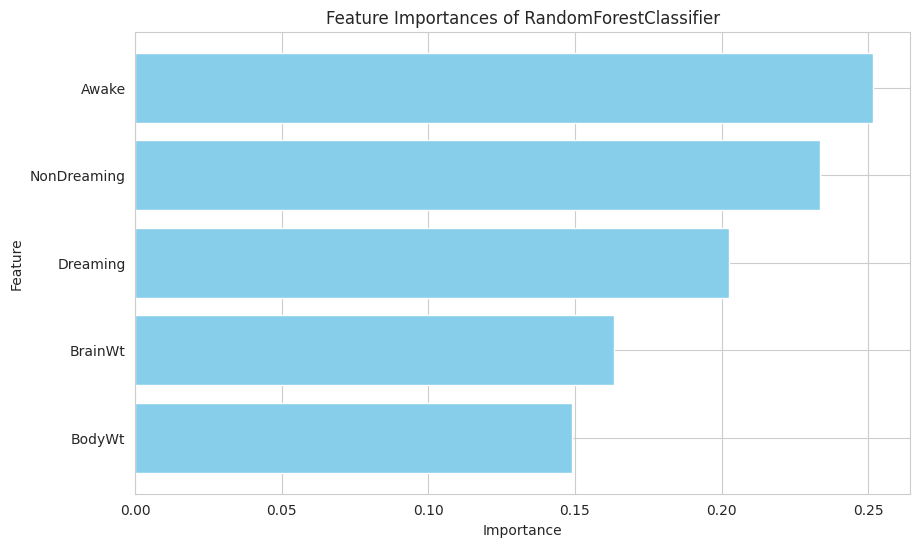

In [155]:
# xgb Feature Importances

feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of RandomForestClassifier')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

## Probabilistic Model
Bayesian models or probabilistic graphical models can be useful for modeling uncertainty and capturing complex relationships in sleep behavior data, particularly when dealing with incomplete or noisy data.

In [157]:
from sklearn.naive_bayes import GaussianNB

In [158]:
# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [159]:
# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

In [160]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


# Performance Metrics Analysis

In [161]:
from sklearn.metrics import accuracy_score

In [164]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           8       0.00      0.00      0.00         1
          10       0.25      1.00      0.40         1
          12       0.50      1.00      0.67         1
          13       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.12      0.33      0.18         6
weighted avg       0.12      0.33      0.18         6



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


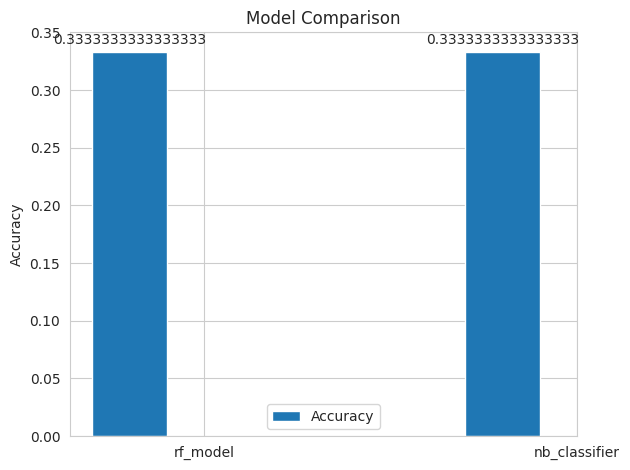

In [167]:
import matplotlib.pyplot as plt
import numpy as np

# Example evaluation metrics for three models
models = ['rf_model', 'nb_classifier']

# Compute accuracy for each model (replace with your actual code)
accuracy_model_1 = accuracy_score(y_test, y_pred_rf)
accuracy_model_2 = accuracy_score(y_test, y_pred_nb)

accuracy = [accuracy_model_1, accuracy_model_2]

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, accuracy, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Auto-label the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()

plt.show()


After implementing multiple strategies to enhance the dataset, including hyperparameter tuning and feature scaling, it has become apparent that the model's performance remains suboptimal. After extensive analysis, several factors have been identified as potential contributors:

1. Random Forest may exhibit diminished effectiveness when confronted with highly correlated
data or redundant variables, which can compromise the diversity among the constituent trees in the forest.

2. Overfitting may occur if the number of trees in the Random Forest model is excessively high, particularly problematic for smaller datasets where the advantages of Random Forest over simpler methods may not be pronounced.

3. Additionally, the dataset reveals a notable correlation between the Awake/Total Sleep variable and other features, suggesting limitations attributed to the dataset's size.

# Set up Filing

In [168]:
!pip freeze > requirements.txt

In [169]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>